                                                                       Data Science II
                                                                   Assignment 2: Clustering

I first imported the basic libraries to my Jupiter Notebook which will help in my analysis and deciphering results.

In [176]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, AffinityPropagation, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from itertools import compress
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
random.seed(42)

Extract the Customer Segmentation Dataset from your local file on the computer extracted from the Kaggle link. 

In [177]:
df= pd.read_csv('/Users/pratiksha/Downloads/Customer_Data.csv')

I printed the dataframe df to check how it looks.

In [178]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0     C10001    40.900749           0.818182      95.40              0.00  \
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                      95.40      0.000000             0.166667  \
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                       0.000000                          0.083333  \
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                   0.000000                 0              2        1000.0  \
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

I used the below function to display the first few rows of the DataFrame 'df', providing a preview of the data.

In [179]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0  C10001    40.900749           0.818182      95.40              0.00  \
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                    95.4      0.000000             0.166667  \
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                    0.000000                          0.083333  \
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                0.000000                 0              2        1000.0  \
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

I used the info() function which provides a concise summary of our DataFrame, including its column names, data types, and non-null values.

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

I used the describe() function to generate descriptive statistics of the df_train, such as count, mean, standard deviation, minimum, maximum, and quartile values, for each numerical column.

In [181]:
df.describe(include='all')

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES   
count     8950   8950.000000        8950.000000   8950.000000  \
unique    8950           NaN                NaN           NaN   
top     C10001           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE   
count        8950.000000             8950.000000   8950.000000  \
unique               NaN                     NaN           NaN   
top                  NaN                     NaN           NaN   
freq                 NaN                     NaN           NaN   
mean          592.437371              411.067645    978.871112   
std          1659.887917              904.338115   2097.163877   
min             0.000000                0.000000      0.000000   
25%             0.000000                0.000000      0.000000   
50%            38.000000               89.000000      0.000000   
75%           577.405000              468.637500   1113.821139   
max         40761.250000            22500.000000  47137.211760   

        PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY   
count           8950.000000                 8950.000000  \
unique                  NaN                         NaN   
top                     NaN                         NaN   
freq                    NaN                         NaN   
mean               0.490351                    0.202458   
std                0.401371                    0.298336   
min                0.000000                    0.000000   
25%                0.083333                    0.000000   
50%                0.500000                    0.083333   
75%                0.916667                    0.300000   
max                1.000000                    1.000000   

        PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY   
count                        8950.000000             8950.000000  \
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                            0.364437                0.135144   
std                             0.397448                0.200121   
min                             0.000000                0.000000   
25%                             0.000000                0.000000   
50%                             0.166667                0.000000   
75%                             0.750000                0.222222   
max                             1.000000                1.500000   

        CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS   
count        8950.000000    8950.000000   8949.000000   8950.000000  \
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
mean            3.248827      14.709832   4494.449450   1733.143852   
std             6.824647      24.857649   3638.815725   2895.063757   
min             0.000000       0.000000     50.000000      0.000000   
25%             0.000000       1.000000   1600.000000    383.276166   
50%             0.000000       7.000000   3000.000000    856.901546   
75%             4.000000      17.000000   6500.000000   1901.134317   
max           123.000000     358.000000  30000.000000  50721.483360   

        MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENUR

The below code is used to print the dimensions or size of the DataFrame.

In [182]:
print('Customer Segmentation Size: ', df.shape)

Customer Segmentation Size:  (8950, 18)


The below code is used to extract the column names of the DataFrame df_train and store them in the variable columns. It will display an array or list of the column names present in the DataFrame. 

In [183]:
columns = df.columns.values
print(columns)

['CUST_ID' 'BALANCE' 'BALANCE_FREQUENCY' 'PURCHASES' 'ONEOFF_PURCHASES'
 'INSTALLMENTS_PURCHASES' 'CASH_ADVANCE' 'PURCHASES_FREQUENCY'
 'ONEOFF_PURCHASES_FREQUENCY' 'PURCHASES_INSTALLMENTS_FREQUENCY'
 'CASH_ADVANCE_FREQUENCY' 'CASH_ADVANCE_TRX' 'PURCHASES_TRX'
 'CREDIT_LIMIT' 'PAYMENTS' 'MINIMUM_PAYMENTS' 'PRC_FULL_PAYMENT' 'TENURE']


___________________________________________________________________________________________________________________________________________________________________________________

### Data Preprocessing [5 marks]:

- Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.
- If applicable, use dimensionality reduction and discuss how it impacts the clusters.
- Explain your data preparation process.

The below code will count the number of missing (NaN or None) values in each column of the DataFrame df_train. 

In [184]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The below code calculates the percentage of missing values in two columns, 'MINIMUM_PAYMENTS' and 'CREDIT LIMIT,' and then reports the individual percentages as well as the total data loss that would occur if these missing values were removed. It provides insights into the extent of missing data in these columns and its impact on the dataset.

In [185]:
# Calculate the percentage of missing values in 'MINIMUM_PAYMENTS' column
missing_min_payments = df['MINIMUM_PAYMENTS'].isna().sum() / df['MINIMUM_PAYMENTS'].count()

# Calculate the percentage of missing values in 'CREDIT LIMIT' column
missing_credit_limit = df['CREDIT_LIMIT'].isna().sum() / df['CREDIT_LIMIT'].count()

# Calculate the total data loss if both missing values are removed
total_data_loss = missing_min_payments + missing_credit_limit

# Print the results
print(f'Percentage of missing values in MINIMUM_PAYMENTS: {missing_min_payments:.2%}')
print(f'Percentage of missing values in CREDIT LIMIT: {missing_credit_limit:.2%}')
print(f'Total data loss after removing missing values: {total_data_loss:.2%}')


Percentage of missing values in MINIMUM_PAYMENTS: 3.62%
Percentage of missing values in CREDIT LIMIT: 0.01%
Total data loss after removing missing values: 3.64%


Due to the relatively small proportion of missing values, which accounts for only 3% of the dataset, I will opt to remove these missing values, as well as any potential duplicates if present.

In [186]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

The below code creates a grid of histograms to visualize the distribution of numerical columns in the DataFrame, excluding the 'CUST_ID' column. It arranges the histograms in rows and columns, with each subplot displaying the distribution of a different column. The sns.histplot function is used to create the histograms, and the code also rotates the x-axis labels for readability.

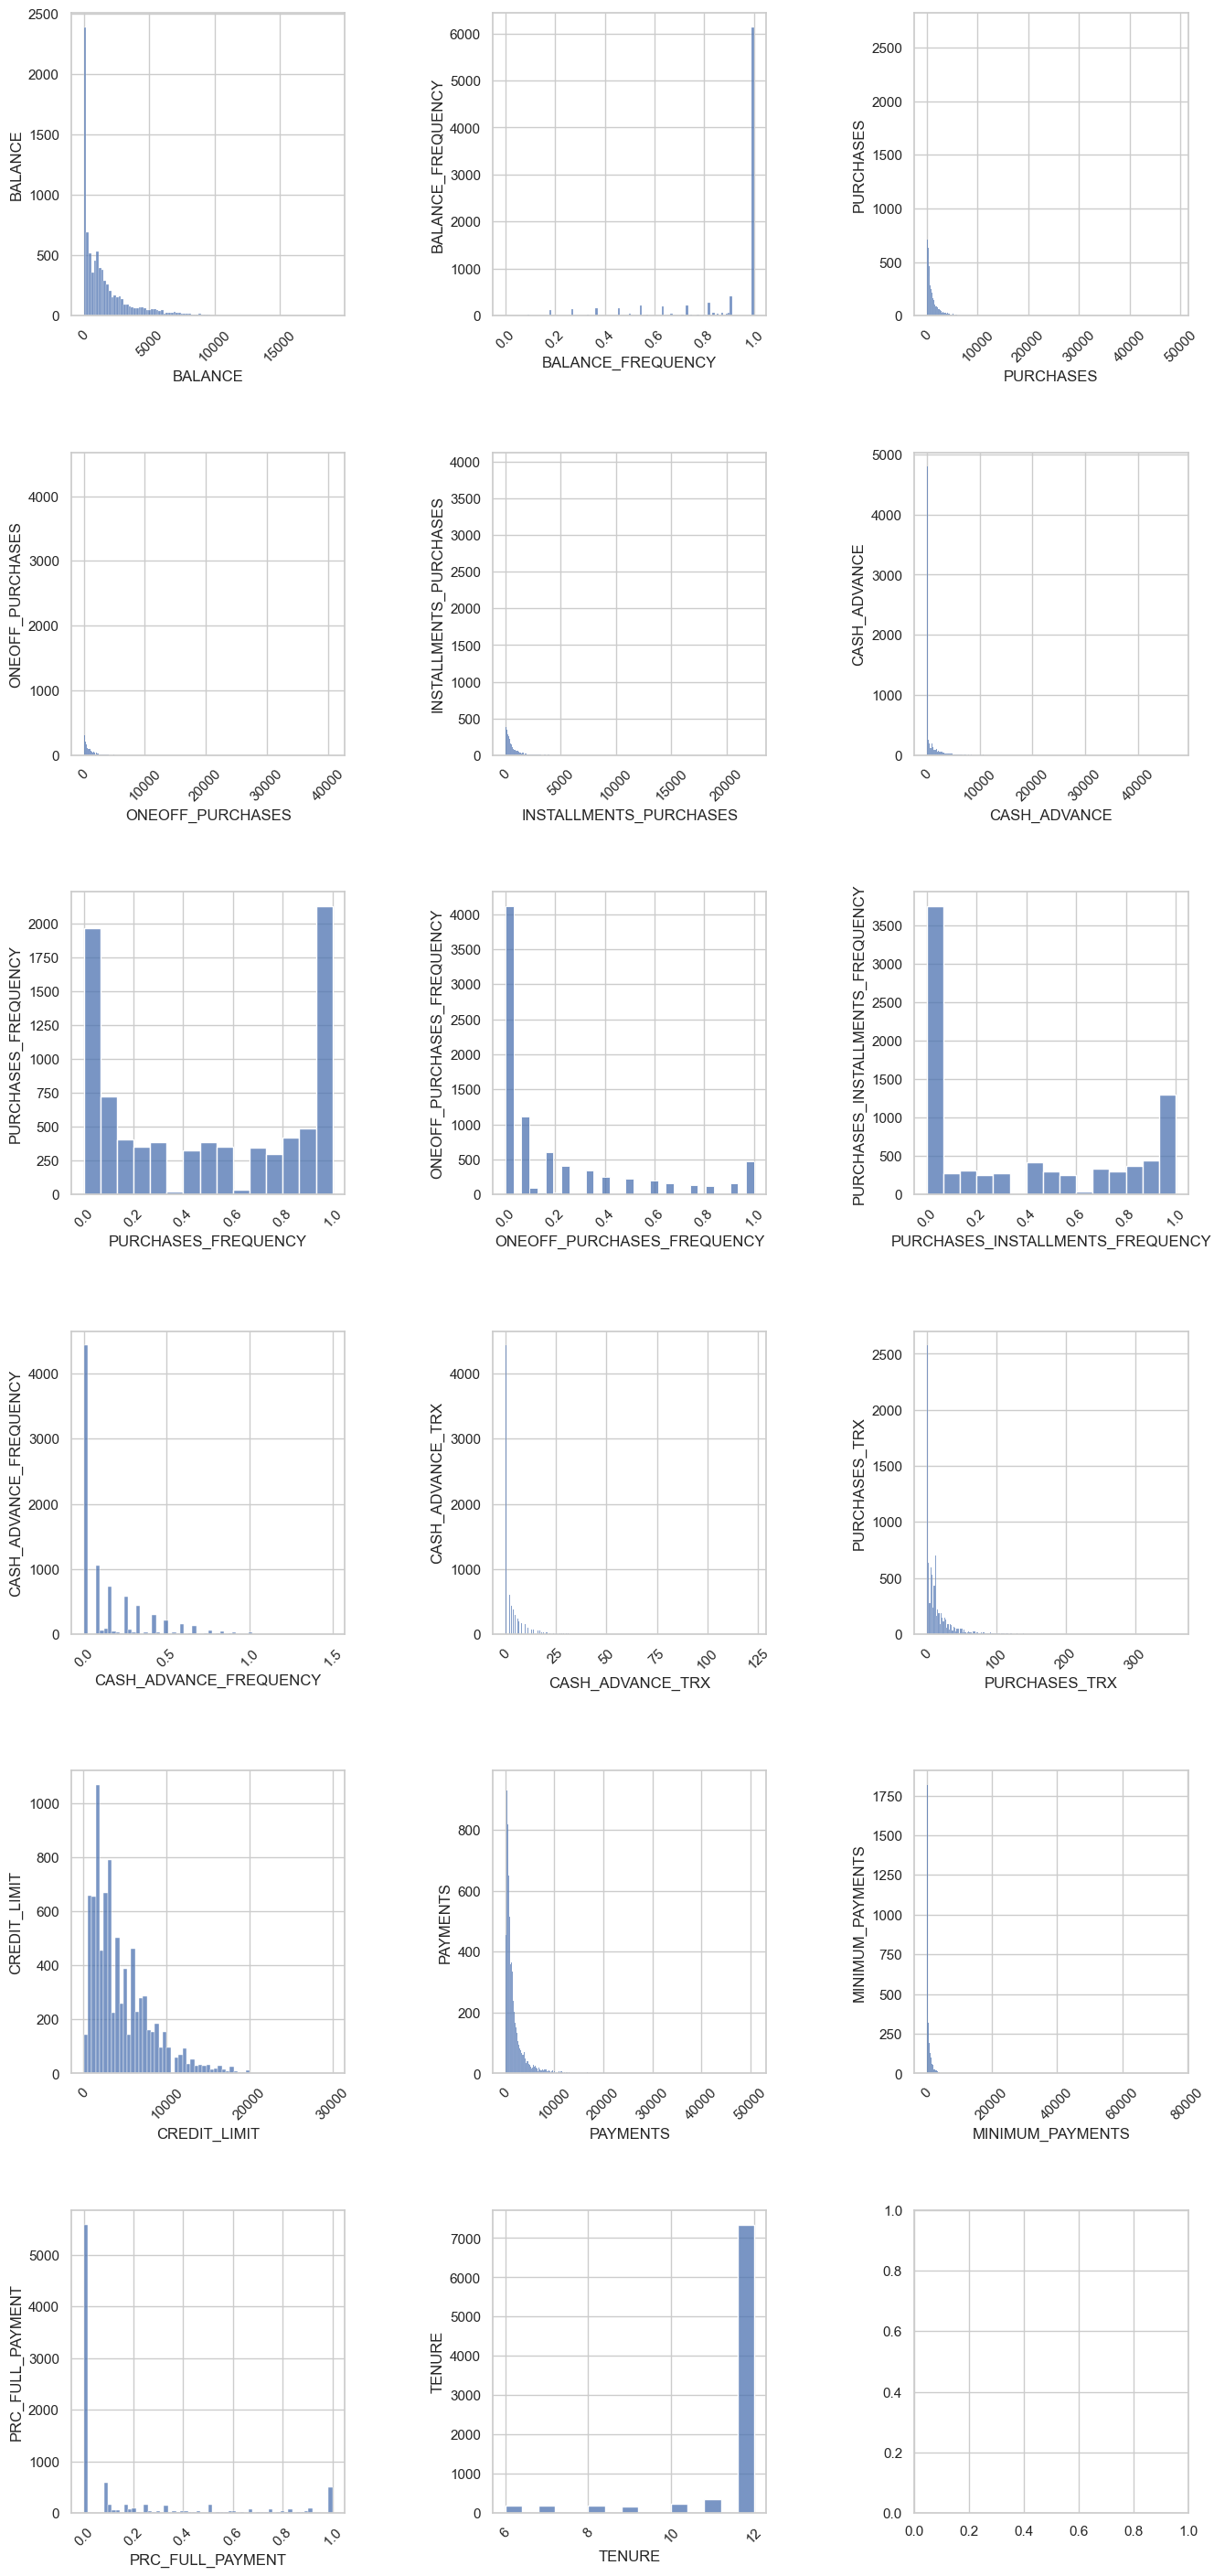

In [187]:
columns = df.columns.drop('CUST_ID')
num_rows = (len(columns)-1)//3+1
num_cols = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
plt.show()

The data indicates a right-skewed distribution for several variables, with a concentration of values at the lower end and relatively few at the higher end. Additionally, there are indications of potential outliers at the upper extreme of the scale for some of these variables. To gain more clarity on this, I'll further investigate these outliers using boxplots.

The below code generates a grid of boxplots to visually examine the distribution of various numerical columns in the dataset. It focuses on the columns listed in columns_to_visualize. Each subplot displays a boxplot for a specific column, providing insights into the median, quartiles, and the presence of potential outliers in the data. This analysis helps in understanding the distribution and the presence of extreme values in the selected columns.

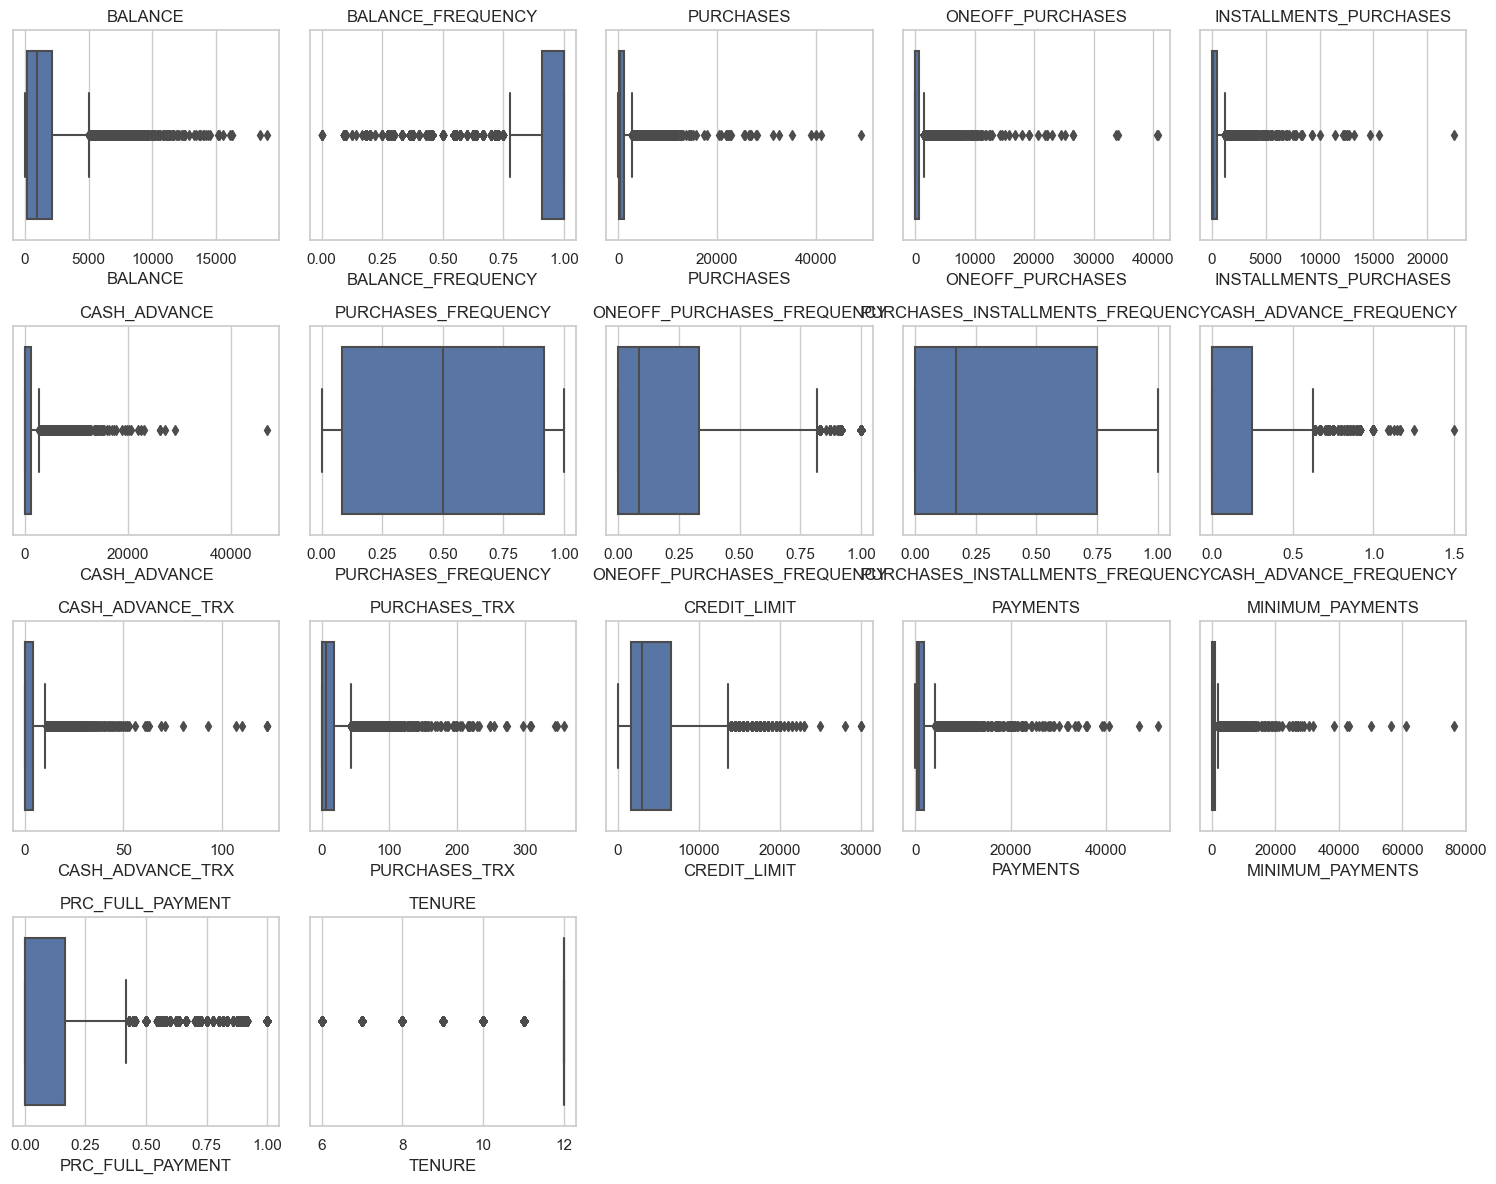

In [188]:
columns_to_visualize = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
    'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT', 'TENURE'
]

plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

As seen from the above box plots, this dataset exhibits a substantial presence of outliers, which can significantly impact the performance of clustering models. While it's not advisable to remove all outliers, as it would result in a significant loss of data, I intend to address some of the more extreme outliers to potentially enhance the performance of clustering models.

To maintain simplicity in the process, I will visually review the boxplot information for each variable and determine a reasonable cutoff point for removing outliers without excessively depleting the dataset. I will exercise caution in not removing values considered "outliers" for features that have specific predefined scales, such as variables constrained to a range of 0 to 1.

Furthermore, variables like "Cash Advance Frequency" should inherently not have values exceeding 1, as they are constrained within the 0 to 1 scale. Therefore, any values above 1 in such cases will also be treated as outliers and removed to ensure data consistency.

In [189]:
df = df[df['CASH_ADVANCE_FREQUENCY'] <= 1]
df = df[df['BALANCE'] < 12500]
df = df[df['CREDIT_LIMIT'] < 22500]
df = df[df['CASH_ADVANCE'] < 10000]
df = df[df['INSTALLMENTS_PURCHASES'] < 6000]
df = df[df['ONEOFF_PURCHASES'] < 12000]
df = df[df['MINIMUM_PAYMENTS'] < 10000]
df = df[df['PAYMENTS'] < 10000]
df = df[df['PURCHASES'] < 12000]
df = df[df['CASH_ADVANCE_TRX'] < 30]
df = df[df['PURCHASES_TRX'] < 300]

Then, I will see how many values we are left with in our dataset.

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8260 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8260 non-null   object 
 1   BALANCE                           8260 non-null   float64
 2   BALANCE_FREQUENCY                 8260 non-null   float64
 3   PURCHASES                         8260 non-null   float64
 4   ONEOFF_PURCHASES                  8260 non-null   float64
 5   INSTALLMENTS_PURCHASES            8260 non-null   float64
 6   CASH_ADVANCE                      8260 non-null   float64
 7   PURCHASES_FREQUENCY               8260 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8260 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8260 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8260 non-null   float64
 11  CASH_ADVANCE_TRX                  8260 non-null   int64  
 12  PURCHASES_T

In [191]:
(8950-8260)/8950*100

7.709497206703911

After removing the outliers and missing values, there is not much data that is removed - it is less than 10% which is a doable amount so my cleaning method is justified and I can finally visualise the cleaned data using box plots to see how if it makes more sense.

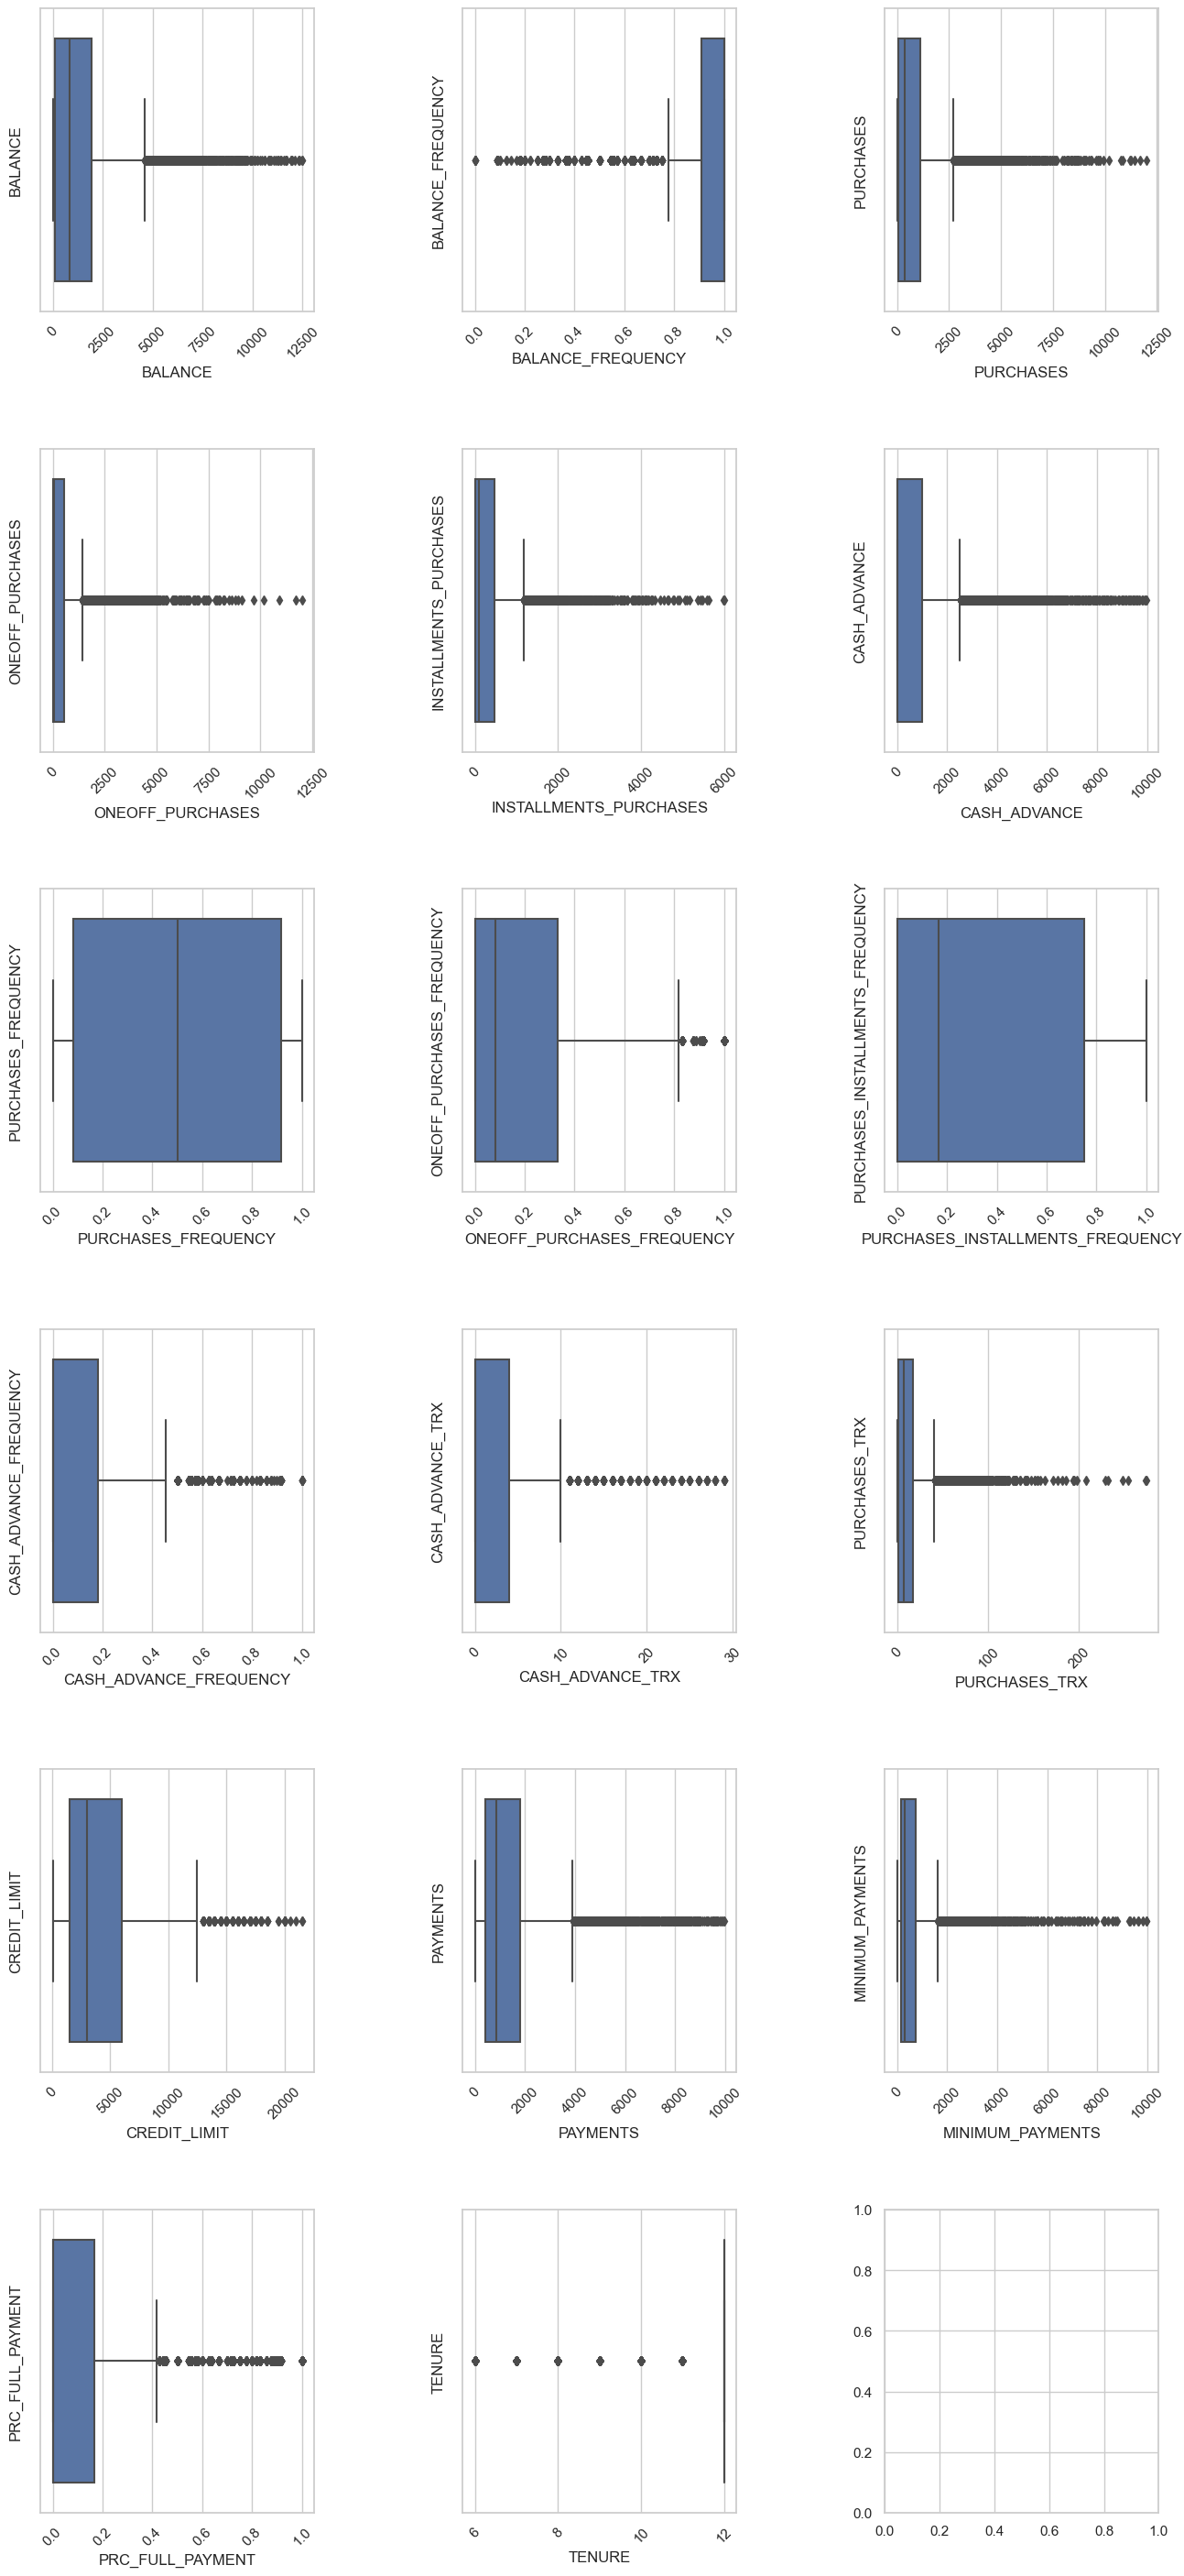

In [192]:
columns = df.columns.drop('CUST_ID')
num_rows = (len(columns)-1)//3+1
num_cols = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
plt.show()

___________________________________________________________________________________________________________________________________________________________________________________

### Exploratory Data Analysis (EDA) [5 marks]:

- Perform an EDA to understand the data and identify patterns that could inform the clustering.
- Explain your findings.

The below code generates a grid of Kernel Density Estimation (KDE) plots for a list of numerical features from the dataset. Each subplot represents the KDE plot for a specific numerical feature, displaying the distribution of that feature. The shading in the KDE plots adds visual context to the distribution. This analysis helps in understanding the shapes and patterns of the data distributions for the selected numerical features. This shows that the data is highly skewed to the right for the majority of the variables.

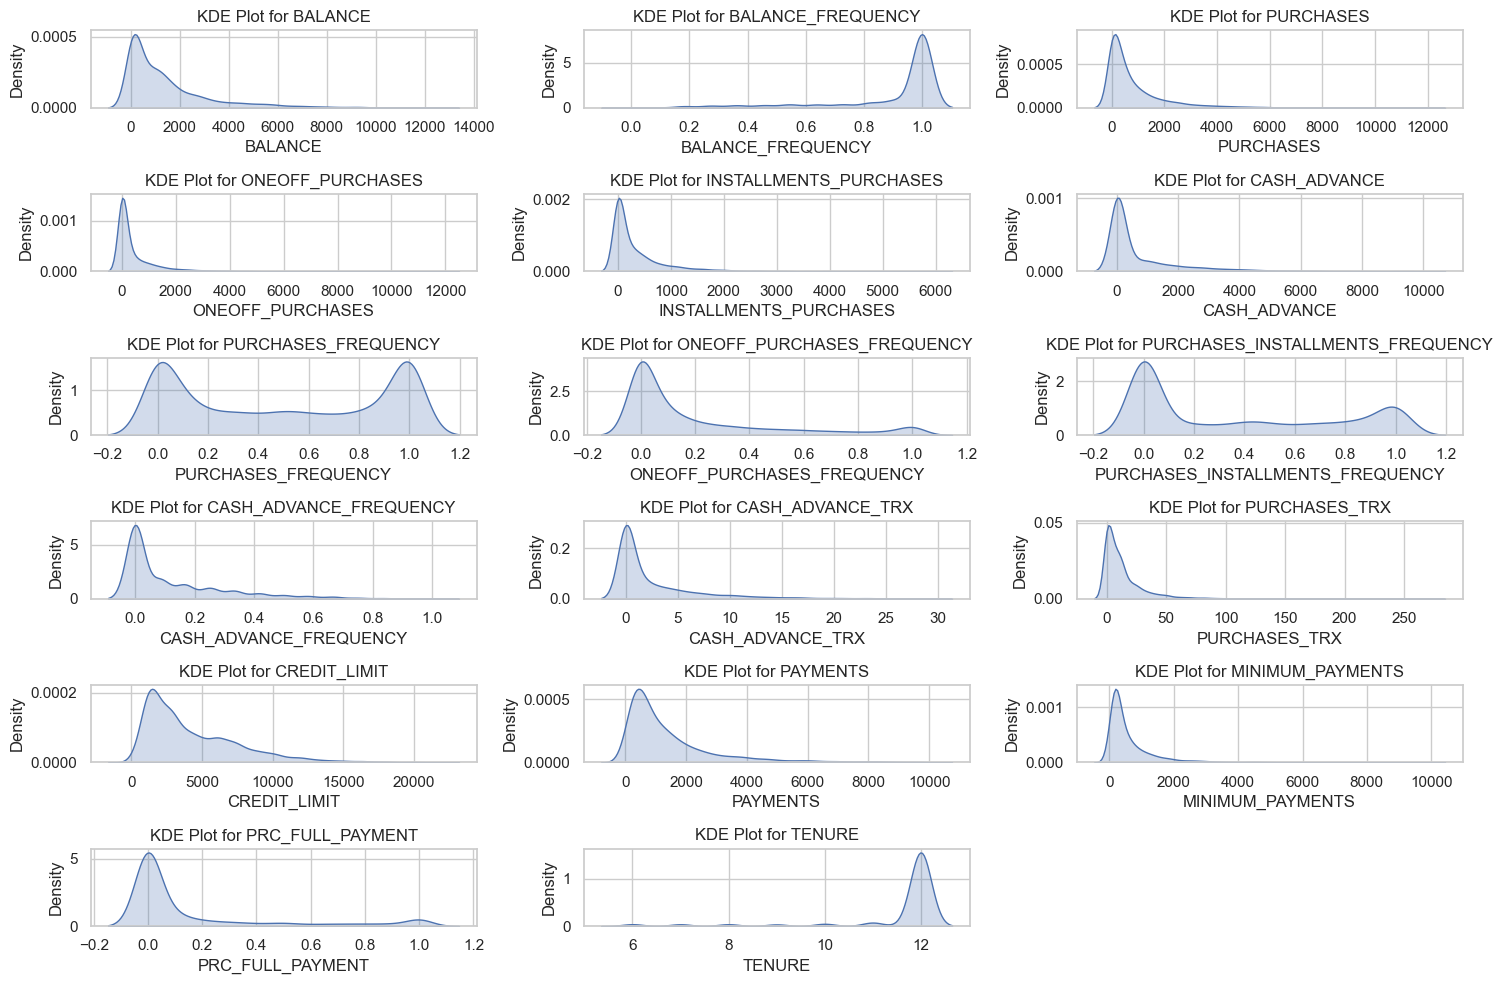

In [193]:

# Create a list of numerical feature names you want to visualize
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
    'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT', 'TENURE']

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Calculate the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=df[feature], shade=True)
    plt.title(f'KDE Plot for {feature}')

plt.tight_layout()
plt.show()


The below code creates a histogram with an overlaid Kernel Density Estimation (KDE) plot for the 'PURCHASES' column in the dataset. It visually represents the distribution of purchase amounts, showing the frequency of different purchase values. The KDE plot provides a smooth curve that offers additional insight into the data's distribution. I saw that the purchases are between 0 to 4000.

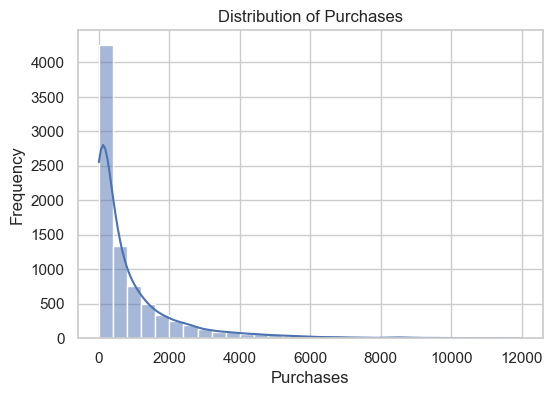

In [194]:
plt.figure(figsize=(6, 4))
sns.histplot(df['PURCHASES'], bins=30, kde=True)
plt.title('Distribution of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.show()

The below code creates a histogram with an overlaid Kernel Density Estimation (KDE) plot for the 'BALANCE' column in the dataset. It visually represents the distribution of account balances, showing the frequency of different balance values. The KDE plot provides a smooth curve that offers additional insight into the data's distribution. When comparing Balance to other features, some general conclusions can be drawn: balance levels are higher, credit limits rise, one-time and installment purchases are typically less expensive, minimum payments rise, and the number of non-payments decreases. These might be features that I include in the grouping.

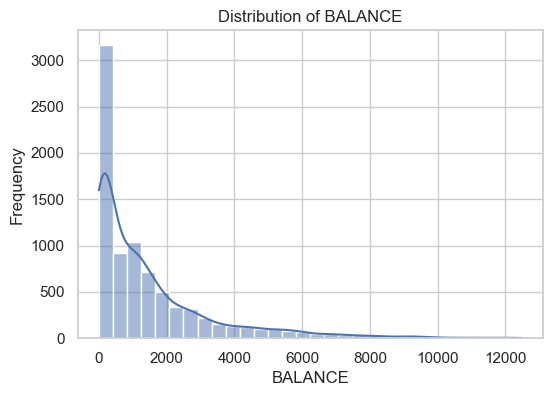

In [195]:
plt.figure(figsize=(6, 4))
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title('Distribution of BALANCE')
plt.xlabel('BALANCE')
plt.ylabel('Frequency')
plt.show()

The below code generates a scatter plot that visualizes the relationship between 'TENURE' (the duration of credit card service) and 'CREDIT LIMIT' (the credit limit assigned to the user's credit card). Each point on the plot represents a data point, and the plot helps to explore how the credit limit varies with the duration of credit card service. The use of transparency (alpha=0.5) allows for better visualization when data points overlap. One important lesson I see from this is that purchase transactions actually decrease at higher credit levels and are typically highest among those with lower to middle credit levels. Perhaps a sign that those with higher credit limits spend more sensibly, buy pricey items less frequently, or use other forms of financing instead of credit cards to make larger purchases.

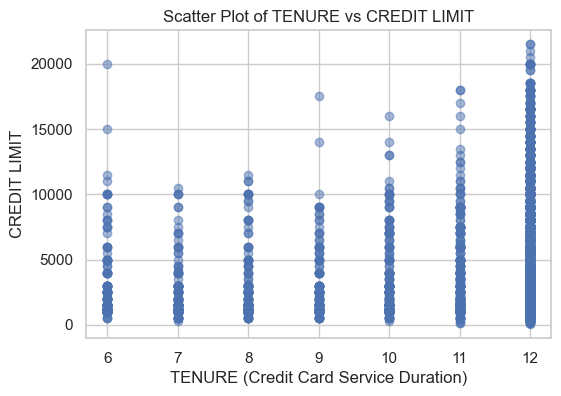

In [196]:
# Create a scatter plot of 'TENURE' vs 'CREDIT LIMIT'
plt.figure(figsize=(6,4))
plt.scatter(df['TENURE'], df['CREDIT_LIMIT'], alpha=0.5)
plt.title('Scatter Plot of TENURE vs CREDIT LIMIT')
plt.xlabel('TENURE (Credit Card Service Duration)')
plt.ylabel('CREDIT LIMIT')
plt.grid(True)
plt.show()

The below code generates a scatter plot that illustrates the relationship between 'CREDIT LIMIT' (the credit limit assigned to the user's credit card) and 'BALANCE' (the remaining balance in the cardholder's account). Each point on the plot represents a data point, and the plot helps to explore how the credit limit correlates with the account balance. The use of transparency (alpha=0.5) enhances the visualization, especially when data points overlap. 

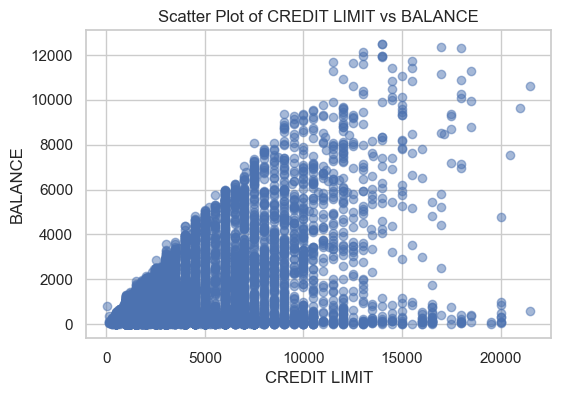

In [197]:
# Create a scatter plot of 'CREDIT LIMIT' vs 'BALANCE'
plt.figure(figsize=(6, 4))
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], alpha=0.5)
plt.title('Scatter Plot of CREDIT LIMIT vs BALANCE')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()

The below code generates a scatter plot that visualizes the relationship between 'PURCHASES' (purchase amount) and 'PURCHASES_TRX' (total transaction count). Each point on the plot represents a data point, and the plot helps to explore how the purchase amount correlates with the total number of transactions. The use of transparency (alpha=0.5) enhances the visualization, especially when data points overlap. The plot provides insights into patterns and trends related to purchase behavior.

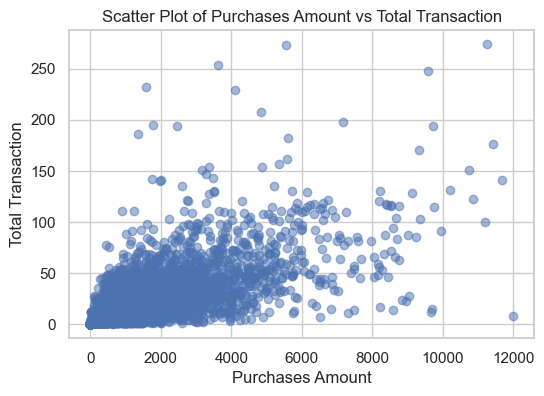

In [198]:
plt.figure(figsize=(6, 4))
plt.scatter(df['PURCHASES'], df['PURCHASES_TRX'], alpha=0.5)
plt.title('Scatter Plot of Purchases Amount vs Total Transaction')
plt.xlabel('Purchases Amount')
plt.ylabel('Total Transaction')
plt.grid(True)
plt.show()

The provided code creates two visualizations to explore the relationship between credit card tenure and purchase behavior. The left subplot is a line plot, showing the trend of purchase amounts ('PURCHASES') based on the duration of credit card service ('TENURE'). It provides insights into how purchase behavior evolves over time. The right subplot is a scatter plot that examines the correlation between 'PURCHASES' and 'TENURE.' Each data point on the scatter plot represents a unique observation, allowing us to observe how purchase amounts are distributed across different tenures. These visualizations provide a comprehensive view of the interaction between credit card service duration and purchase patterns, helping to identify any underlying trends or patterns.

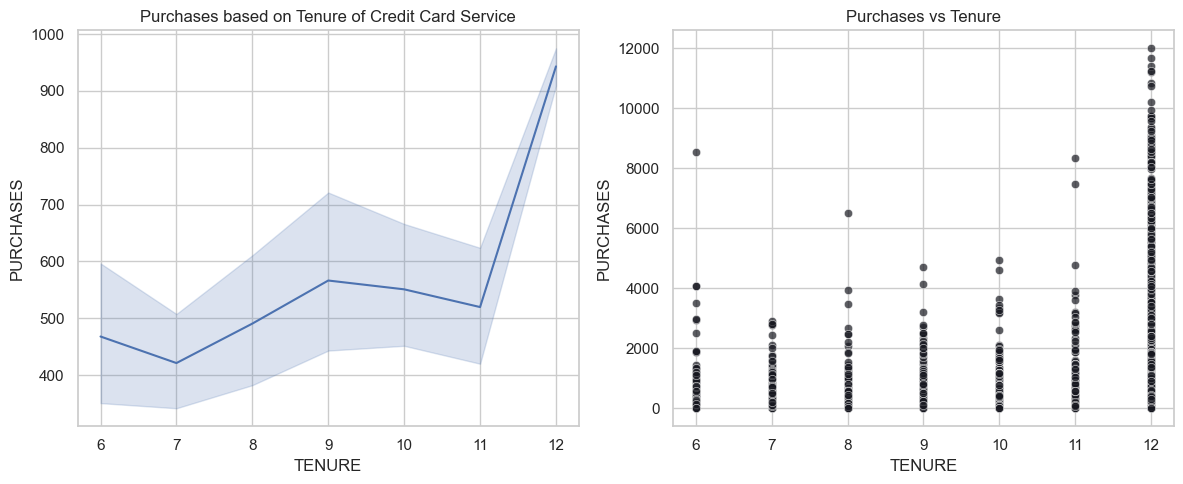

In [199]:
plt.figure(figsize=(12, 5))

# Line plot of Purchases based on Tenure
plt.subplot(1, 2, 1)
sns.lineplot(x='TENURE', y='PURCHASES', data=df)
plt.title('Purchases based on Tenure of Credit Card Service')

# Scatter plot of Purchases vs Tenure
plt.subplot(1, 2, 2)
sns.scatterplot(x='TENURE', y='PURCHASES', data=df, color='#171820', alpha=0.7)
plt.title('Purchases vs Tenure')

plt.tight_layout()
plt.show()

This code identifies the top ten customers with the highest 'ONEOFF_PURCHASES' (maximum amount of purchase made in a single transaction) and prints their customer identification numbers ('CUST_ID') along with their corresponding 'ONEOFF_PURCHASES' values. This information helps identify the customers who have made the largest one-off purchases in the dataset, allowing for further analysis or targeted actions if necessary.

In [200]:
top_ten_oneoff_purchases = df.sort_values(by='ONEOFF_PURCHASES', ascending=False).head(10)

print("Top Ten Purchases in 'ONEOFF_PURCHASES':")
print(top_ten_oneoff_purchases[['CUST_ID', 'ONEOFF_PURCHASES']])

Top Ten Purchases in 'ONEOFF_PURCHASES':
     CUST_ID  ONEOFF_PURCHASES
7378  C17579          11994.71
574   C10598          11681.64
624   C10649          10929.53
5575  C15731          10165.88
1373  C11419           9661.37
5054  C15196           9081.24
6273  C16448           8945.67
5018  C15159           8775.37
3105  C13195           8636.73
6334  C16509           8500.67


This code identifies the bottom ten customers with the lowest 'MINIMUM_PAYMENTS' and prints their customer identification numbers ('CUST_ID') along with their corresponding 'MINIMUM_PAYMENTS' values. This information helps identify the customers with the smallest minimum payments in the dataset. Understanding these cases can be important for various financial analyses, including assessing credit card payment behavior.

In [201]:
bottom_ten_minimum_payments = df.sort_values(by='MINIMUM_PAYMENTS').head(10)

print("Bottom Ten Purchases with 'MINIMUM_PAYMENTS':")
print(bottom_ten_minimum_payments[['CUST_ID', 'MINIMUM_PAYMENTS']])

Bottom Ten Purchases with 'MINIMUM_PAYMENTS':
     CUST_ID  MINIMUM_PAYMENTS
1978  C12041          0.019163
7927  C18142          0.037744
3787  C13895          0.055880
8014  C18231          0.059481
1419  C11467          0.117036
5875  C16040          0.261984
8713  C18950          0.311953
7678  C17884          0.319475
7971  C18187          1.113027
4332  C14453          1.334075


A notable observation from the analysis is that there appears to be an inverse relationship between one-off purchases and minimum payments. Individuals who make a higher number of one-off purchases tend to have lower minimum payments, while those with higher minimum payments tend to have fewer one-off purchases. This pattern might suggest that individuals with fewer one-off purchases tend to buy more expensive items, which results in higher minimum payments. Alternatively, it could indicate that individuals making higher minimum payments are more financially responsible, paying off their credit balances in larger amounts and using their credit cards less frequently.


After experimenting with different sets of features, I have identified a specific set that offers a more informative data distribution for creating meaningful clusters. Initially using all features resulted in a dense and cluttered data distribution, so I opted to remove some features to achieve clearer and more distinguishable clusters.

In [202]:
numerical_features = ['BALANCE', 'CREDIT_LIMIT','PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)])
df[numerical_features] = preprocessor.fit_transform(df[numerical_features])

I will thus check how the numerical features look.

In [203]:
df[numerical_features]

BALANCE  CREDIT_LIMIT  PURCHASES  ONEOFF_PURCHASES   
0    -0.758382     -0.971139  -0.581054         -0.491551  \
1     0.931981      0.789567  -0.651896         -0.491551   
2     0.553806      0.936292  -0.077758          0.256688   
4    -0.343051     -0.912448  -0.640014         -0.476067   
5     0.187393     -0.736378   0.338167         -0.491551   
...        ...           ...        ...               ...   
8943 -0.777111     -1.117864  -0.636376         -0.471325   
8945 -0.765016     -0.971139  -0.435717         -0.491551   
8947 -0.767740     -0.971139  -0.544668         -0.491551   
8948 -0.773055     -1.117864  -0.651896         -0.491551   
8949 -0.580978     -0.912448   0.159926          0.566447   

      INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY   
0                  -0.428962            -0.823508                   -0.682448  \
1                  -0.577879            -1.240362                   -0.682448   
2                  -0.577879             1.260755                    2.690193   
4                  -0.577879            -1.031936                   -0.401395   
5                   1.503334             0.427050                   -0.682448   
...                      ...                  ...                         ...   
8943               -0.577879            -0.823508                   -0.120340   
8945               -0.123449             1.260755                   -0.682448   
8947               -0.352474             0.843901                   -0.682448   
8948               -0.577879            -1.240362                   -0.682448   
8949               -0.577879             0.427050                    1.565980   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY   
0                            -0.716163               -0.685283  \
1                            -0.926260                0.662052   
2                            -0.926260               -0.685283   
4                            -0.926260               -0.685283   
5                             0.544425               -0.685283   
...                                ...                     ...   
8943                         -0.926260               -0.685283   
8945                          1.174719               -0.685283   
8947                          0.754525               -0.685283   
8948                         -0.926260                0.212942   
8949                         -0.926260                1.111162   

      CASH_ADVANCE_TRX  PURCHASES_TRX  
0            -0.577001      -0.560841  
1             0.264719      -0.654597  
2            -0.577001      -0.092059  
4            -0.577001      -0.607719  
5            -0.577001      -0.279572  
...                ...            ...  
8943         -0.577001      -0.607719  
8945         -0.577001      -0.373328  
8947         -0.577001      -0.420207  
8948         -0.156141      -0.654597  
8949         -0.156141       0.423600  

[8260 rows x 11 columns]

The categorical column of 'Customer ID" doesn't make any sense in the dataframe so I will remove that column for the data clustering.

In [204]:
df.drop(['CUST_ID'], inplace=True, axis=1)

The below code performs correlation analysis on the dataset by calculating the correlation between numerical features and creating a heatmap to visualize the results. The correlation matrix is displayed as a heatmap, where each cell represents the strength and direction of the correlation between two variables. The colors and values in the heatmap indicate the degree of correlation. This analysis helps identify relationships between variables, both positive and negative, and is useful for feature selection and understanding the dataset's structure hence giving more clarity on which features to choose for data clustering.

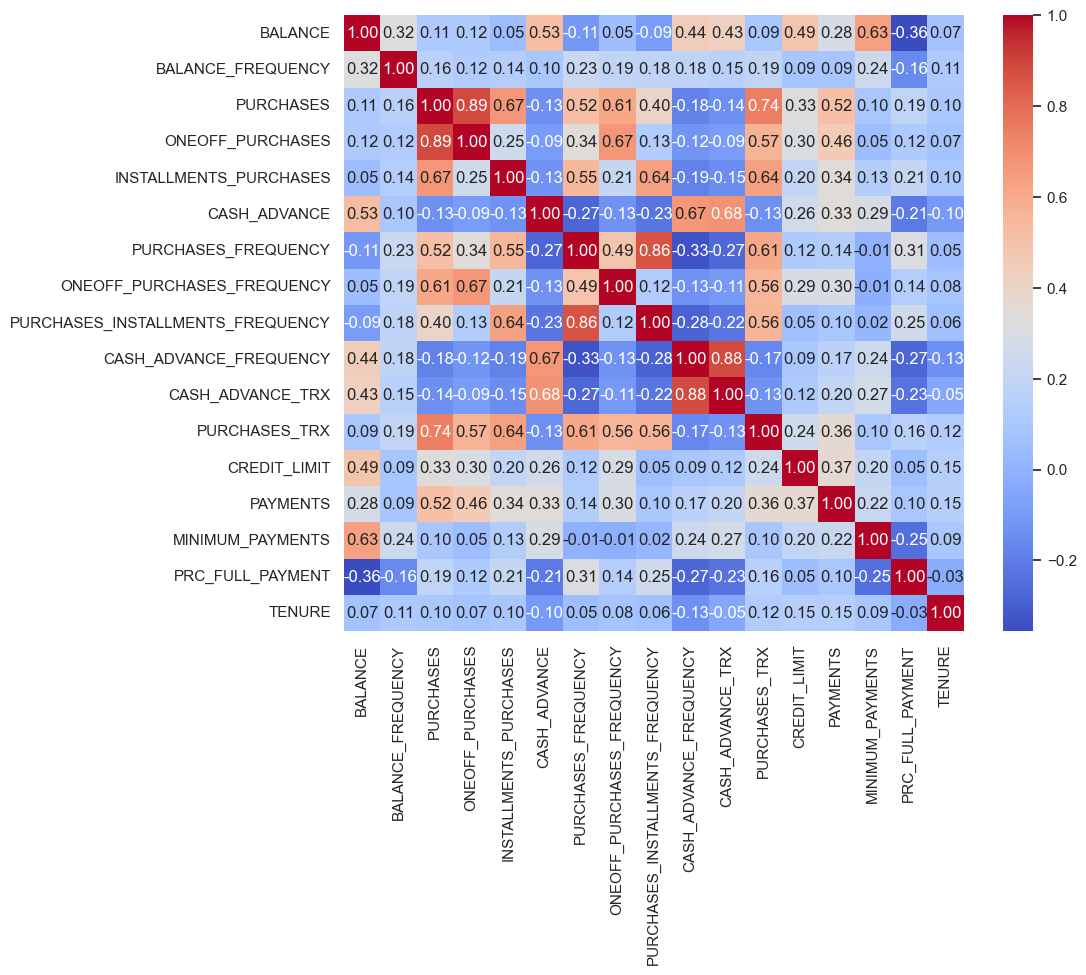

In [205]:
#  Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

The below code performs Principal Component Analysis (PCA) on the dataset's numerical features. It first initializes a PCA object, 'pca', and then fits it to the data. The transformed data is stored in a new dataframe, 'df_pca,' with columns labeled as 'PC1', 'PC2', and so on. The code prints two crucial pieces of information: the explained variance ratio, which indicates the proportion of variance explained by each principal component, and the cumulative explained variance ratio, which shows the cumulative variance explained by all principal components. These ratios help in understanding how much information is retained in the reduced-dimension representation. Finally, it displays the first few rows of the transformed dataframe, providing a glimpse of the data after PCA.

In [206]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df[numerical_features])

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df[numerical_features].columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [4.05659900e-01 2.17793917e-01 1.26068748e-01 8.46353912e-02
 5.82863056e-02 3.77529843e-02 3.17902661e-02 2.34401626e-02
 1.05668022e-02 4.00388208e-03 1.64105890e-06]
Cumulative explained variance ratio: [0.4056599  0.62345382 0.74952256 0.83415796 0.89244426 0.93019725
 0.96198751 0.98542767 0.99599448 0.99999836 1.        ]


PC1       PC2       PC3       PC4       PC5       PC6       PC7   
0 -1.477022 -1.463044  0.564275 -0.125410  0.578907 -0.116386 -0.153174  \
1 -1.929510  1.152602  0.233784  1.015607  0.259078  0.010265 -0.081404   
2  1.203945  0.405539  1.824234  0.525707 -2.152952 -0.161077 -1.021970   
3 -1.616084 -1.143857  0.851914  0.035966  0.478827 -0.383129 -0.347472   
4  0.610828 -1.113933 -1.105479  0.378143  1.005695 -0.421280 -0.093059   

        PC8       PC9      PC10      PC11  
0  0.074326  0.141626  0.037827 -0.000175  
1  0.153379 -0.229845 -0.061610 -0.000099  
2 -0.974797  0.111602  0.445464 -0.000002  
3 -0.018860  0.162540 -0.074288 -0.000124  
4 -0.897652  0.112010  0.153795 -0.000169

The below code selects the first two principal components from the 'df_pca' dataframe and stores them in a new dataframe 'df_pca.' It effectively reduces the dimensionality of the data to retain only the information captured by the first two principal components, which can be useful for visualization and further analysis in a 2-D space.

In [207]:
df_pca = df_pca.iloc[:,0:2]

Printing 'df_pca.head()' will display the first few rows of the 'df_pca' dataframe, showing the transformed data with only the first two principal components. This reduced-dimensional representation can be easier to interpret and visualize compared to the original data.

In [208]:
df_pca.head()

PC1       PC2
0 -1.477022 -1.463044
1 -1.929510  1.152602
2  1.203945  0.405539
3 -1.616084 -1.143857
4  0.610828 -1.113933

The below code assigns the 'df_pca' dataframe to a variable 'X,' indicating that 'X' now holds the data with reduced dimensionality, containing only the first two principal components. 

In [209]:
X = df_pca

___________________________________________________________________________________________________________________________________________________________________________________

### Clustering Algorithms [10 marks]:

- Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
- Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
- Discuss each method, and select the most appropriate

The below code performs a comprehensive analysis to determine the optimal number of clusters for K-means clustering on a reduced-dimensional dataset. It iterates through a range of cluster numbers, calculating the within-cluster sum of squares (inertia) for each case, which is used to find the "elbow point" in the first plot. The elbow point indicates a suitable number of clusters where the inertia begins to plateau, signifying a good trade-off between cluster count and variance explained. Additionally, the code computes the silhouette score, a measure of cluster quality, for each cluster number and displays it in the second plot. A higher silhouette score suggests more distinct and well-separated clusters. These two metrics provide valuable guidance in selecting the optimal number of clusters for the K-means algorithm, helping to make informed decisions about the data's natural groupings.

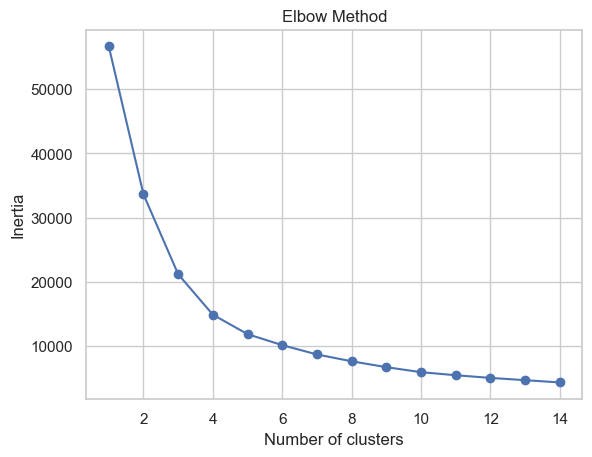

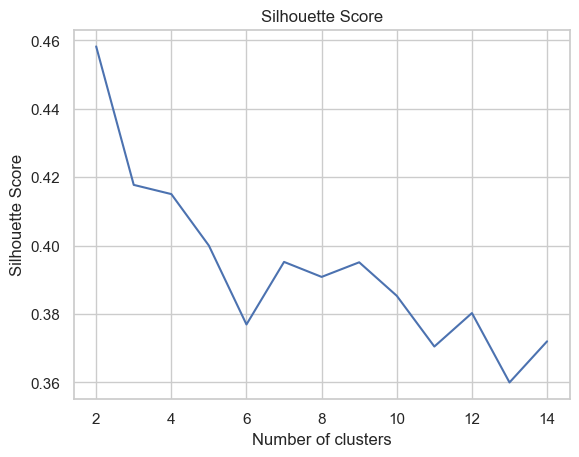

In [210]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(X, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

**K-MEANS CLUSTERING**

The below code carries out K-means clustering with four clusters on the reduced-dimensional data created through PCA. The primary goal is to group data points into clusters based on their similarity. After clustering, the code calculates the silhouette score to evaluate the quality of the clustering. A higher silhouette score indicates well-separated and distinct clusters. The code then visualizes the clusters using a scatter plot, where each data point is color-coded according to its assigned cluster, and the cluster centers are marked in red. This visualization provides a clear view of how data points are grouped and the positions of the cluster centers. Overall, the code helps in understanding the clustering patterns and their quality in the context of the data analysis.

Silhouette Score for K-means Clustering: 0.4155759536509746


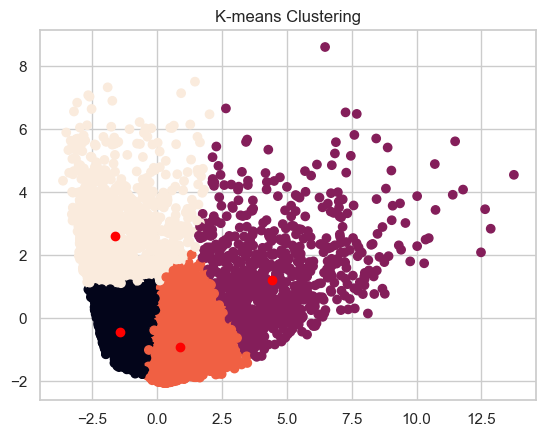

In [211]:
# Applying K-means with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for K-means Clustering: {sil_score}")

# Plotting the clusters
km_labels = kmeans.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=km_labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


**DBSCAN**

The below code performs an analysis to determine the optimal value of epsilon (eps) for the DBSCAN clustering algorithm. DBSCAN identifies clusters based on data density, and the choice of epsilon influences the size and shape of these clusters. The code iterates through a range of epsilon values, from 0.1 to 1.5, and for each epsilon value, it applies DBSCAN with a minimum of 15 data points required to form a cluster within that neighborhood. The silhouette score is then calculated for each clustering result, providing a measure of the quality of the clusters. The code plots the silhouette scores against the corresponding epsilon values, enabling the selection of the epsilon value that maximizes the silhouette score. This analysis helps identify the most appropriate density parameter for DBSCAN, ensuring that it forms well-defined and meaningful clusters in the data.

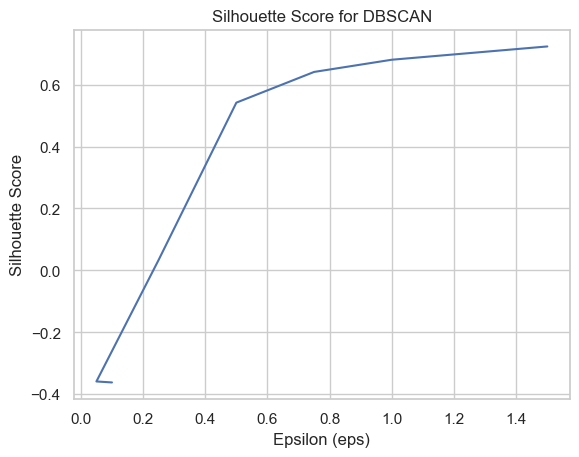

In [212]:
eps_values = [0.1,0.05,0.25,0.5,0.75,1,1.5]  
silhouette_avg = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=15)
    labels = dbscan.fit_predict(X)
    
    if len(set(labels)) > 1:  
        silhouette_avg.append(silhouette_score(X, labels))
    else:
        silhouette_avg.append(0)

plt.plot(eps_values, silhouette_avg)
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.show()

The below code employs the DBSCAN clustering algorithm on a reduced-dimensional dataset, aiming to identify clusters based on data density. It specifies parameters like the epsilon (eps) radius and minimum samples required to form a cluster. The code calculates the silhouette score to gauge the quality of the clusters and visualizes the results with a scatter plot. The silhouette score measures how well data points are grouped, and the plot helps to understand the clustering patterns. Additionally, it accounts for the possibility of noise points in DBSCAN by checking the number of distinct clusters formed. If clear clusters emerge, the silhouette score is displayed; otherwise, it indicates that distinct clusters were not formed. This analysis aids in uncovering inherent structures in the data while evaluating the clustering performance.

DBSCAN Silhouette Score: 0.5416296309728995


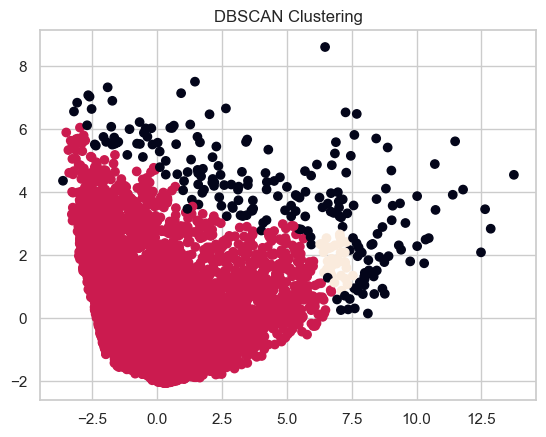

In [213]:
# Importing required library
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")
else:
    print("DBSCAN did not form distinct clusters.")

# Plotting
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()



**AGGLOMERATIVE CLUSTERING**

The below code performs an analysis to determine the optimal number of clusters for the Agglomerative Clustering algorithm, which is a hierarchical clustering technique. It explores a range of cluster counts from 2 to 14, using silhouette scores as a measure of cluster quality. The silhouette score quantifies how similar data points are to their assigned clusters compared to other clusters, with higher scores indicating better-defined clusters. The code applies Agglomerative Clustering for each cluster count and calculates the silhouette score for each clustering result. The results are then plotted, showing the relationship between the number of clusters and the corresponding silhouette scores. This analysis helps identify the ideal number of clusters that maximize the quality of cluster formation, ensuring that the data is partitioned into meaningful and well-separated groups.

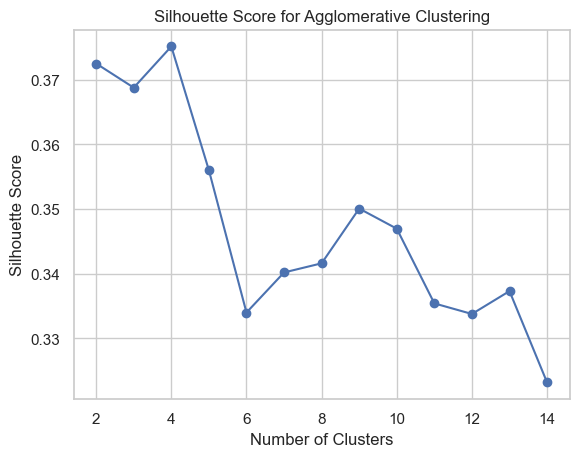

In [214]:
n_clusters_range = range(2, 15)
silhouette_avg = []

for n_clusters in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(X)
    
    if len(set(labels)) > 1: 
        silhouette_avg.append(silhouette_score(X, labels))
    else:
        silhouette_avg.append(0)

plt.plot(n_clusters_range, silhouette_avg,marker='o')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The below code performs Agglomerative Clustering with a predetermined number of clusters (k=4) on the dataset represented by the variable 'X.' It assigns data points to clusters based on their similarity and connectivity. The silhouette score, which quantifies the quality of clustering, is calculated for the clustering result. The code then displays a scatter plot, where each data point is colored according to its assigned cluster label. The silhouette score is printed to assess the clustering quality. This visualization and score provide insights into the effectiveness of Agglomerative Clustering in partitioning the data into meaningful clusters, with a higher silhouette score indicating better-defined clusters.

0.3751534369186835


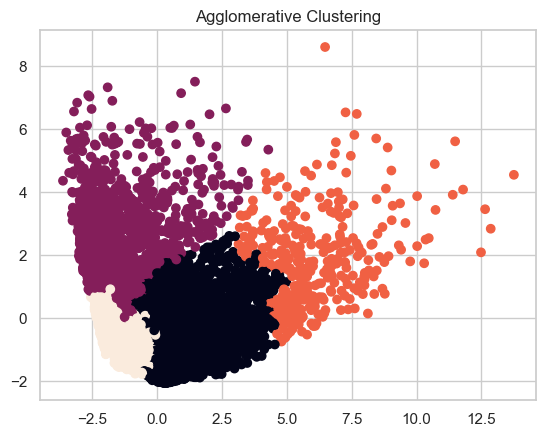

In [215]:
k = 4

hierarchical = AgglomerativeClustering(n_clusters=k)
ac_labels = hierarchical.fit_predict(X)
silhouette_avg = silhouette_score(X, ac_labels)
print(silhouette_avg)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=ac_labels)
plt.title('Agglomerative Clustering')
plt.show()

**AFFINITY PROPOGATION CLUSTERING**

The below code performs clustering using the Affinity Propagation algorithm on the dataset represented by the variable 'X.' Affinity Propagation identifies clusters by sending messages between data points, and it automatically determines the number of clusters. It calculates the silhouette score to evaluate the quality of the clustering. The silhouette score measures how well data points are grouped, with higher scores indicating better-defined clusters. The code prints the Affinity Propagation Silhouette Score and visualizes the clustering results using a scatter plot, with data points colored according to their assigned cluster labels. This analysis aids in understanding the data's inherent structure and the effectiveness of Affinity Propagation in identifying meaningful clusters.

Affinity Propagation Silhouette Score: 0.114392821338253


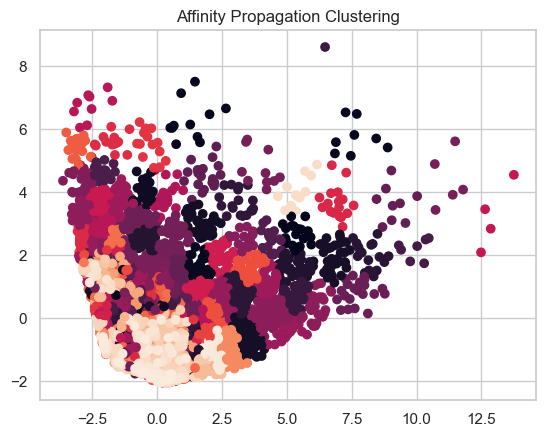

In [216]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silhouette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()

**HIERARCHICAL CLUSTERING**

The below code utilizes the SciPy library to create a dendrogram for hierarchical clustering. It begins by generating a linkage matrix (Z) using the Ward linkage method, which is a common approach for hierarchical clustering. The linkage matrix encodes the hierarchical relationships between data points in the dataset. Subsequently, the code generates a dendrogram, which is a tree-like diagram that represents the clustering hierarchy. Each branch of the dendrogram corresponds to a merging of clusters at a specific similarity level. The visualization helps in understanding how data points are grouped into clusters based on their pairwise similarities.

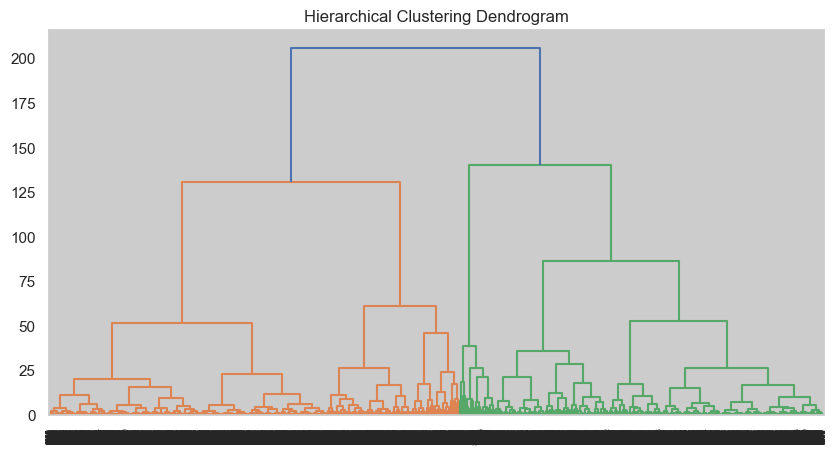

In [217]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

___________________________________________________________________________________________________________________________________________________________________________________

### Interpreting Clusters [5 marks]:

- Characterize the clusters formed: What kind of customers fall into each cluster? What features are most significant in distinguishing between clusters?

The most promising options appear to be K_Means Clustering and Agglomerative Clustering based on the silhouette score and visual plot results. In addition to providing a sizable number of customer clusters that should aid in better customer segmentation groups and some insights into customer behaviour, the silhouette scores are among the highest. To see how the various feature data is distributed among the various cluster labels, I will apply the labels to the original dataframe. From a business standpoint, I want to know which clustering model has grouped the customers the most clearly.

In the below code, two columns are added to the DataFrame 'df' to store the cluster labels obtained from two different clustering algorithms: K-means clustering and Agglomerative Clustering. The column 'KMEANS_CLUSTER' holds the cluster labels assigned by the K-means clustering algorithm, and the column 'AGGLOMERATIVE_CLUSTERING' contains the cluster labels assigned by the Agglomerative Clustering algorithm. These labels represent which cluster each data point belongs to. By adding these columns to the DataFrame, you can now analyze and visualize the data with respect to the clusters obtained from these two clustering techniques.

In [218]:
df['KMEANS_CLUSTER'] = km_labels
df['AGGLOMERATIVE_CLUSTERING'] = ac_labels
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0 -0.758382           0.818182  -0.581054         -0.491551  \
1  0.931981           0.909091  -0.651896         -0.491551   
2  0.553806           1.000000  -0.077758          0.256688   
4 -0.343051           1.000000  -0.640014         -0.476067   
5  0.187393           1.000000   0.338167         -0.491551   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0               -0.428962      0.000000            -0.823508  \
1               -0.577879   6442.945483            -1.240362   
2               -0.577879      0.000000             1.260755   
4               -0.577879      0.000000            -1.031936   
5                1.503334      0.000000             0.427050   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                   -0.682448                         -0.716163  \
1                   -0.682448                         -0.926260   
2                    2.690193                         -0.926260   
4                   -0.401395                         -0.926260   
5                   -0.682448                          0.544425   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0               -0.685283         -0.577001      -0.560841     -0.971139  \
1                0.662052          0.264719      -0.654597      0.789567   
2               -0.685283         -0.577001      -0.092059      0.936292   
4               -0.685283         -0.577001      -0.607719     -0.912448   
5               -0.685283         -0.577001      -0.279572     -0.736378   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  KMEANS_CLUSTER   
0   201.802084        139.509787          0.000000      12               0  \
1  4103.032597       1072.340217          0.222222      12               3   
2   622.066742        627.284787          0.000000      12               2   
4   678.334763        244.791237          0.000000      12               0   
5  1400.057770       2407.246035          0.000000      12               2   

   AGGLOMERATIVE_CLUSTERING  
0                         3  
1                         1  
2                         0  
4                         3  
5                         0

The below code generates a grid of boxplots to visualize the distribution of each feature within different clusters obtained from the K-means clustering. The variable 'feature' iterates through the columns of the DataFrame 'df,' excluding the last two columns ('KMEANS_CLUSTER' and 'AGGLOMERATIVE_CLUSTERING'). For each feature, a boxplot is created, showing how the data is distributed across the clusters identified by K-means clustering. Each boxplot represents a specific feature's values for each cluster, allowing you to assess the differences in the feature distributions between clusters. This analysis helps in understanding how different features vary within the clusters and can provide insights into the characteristics of each cluster.

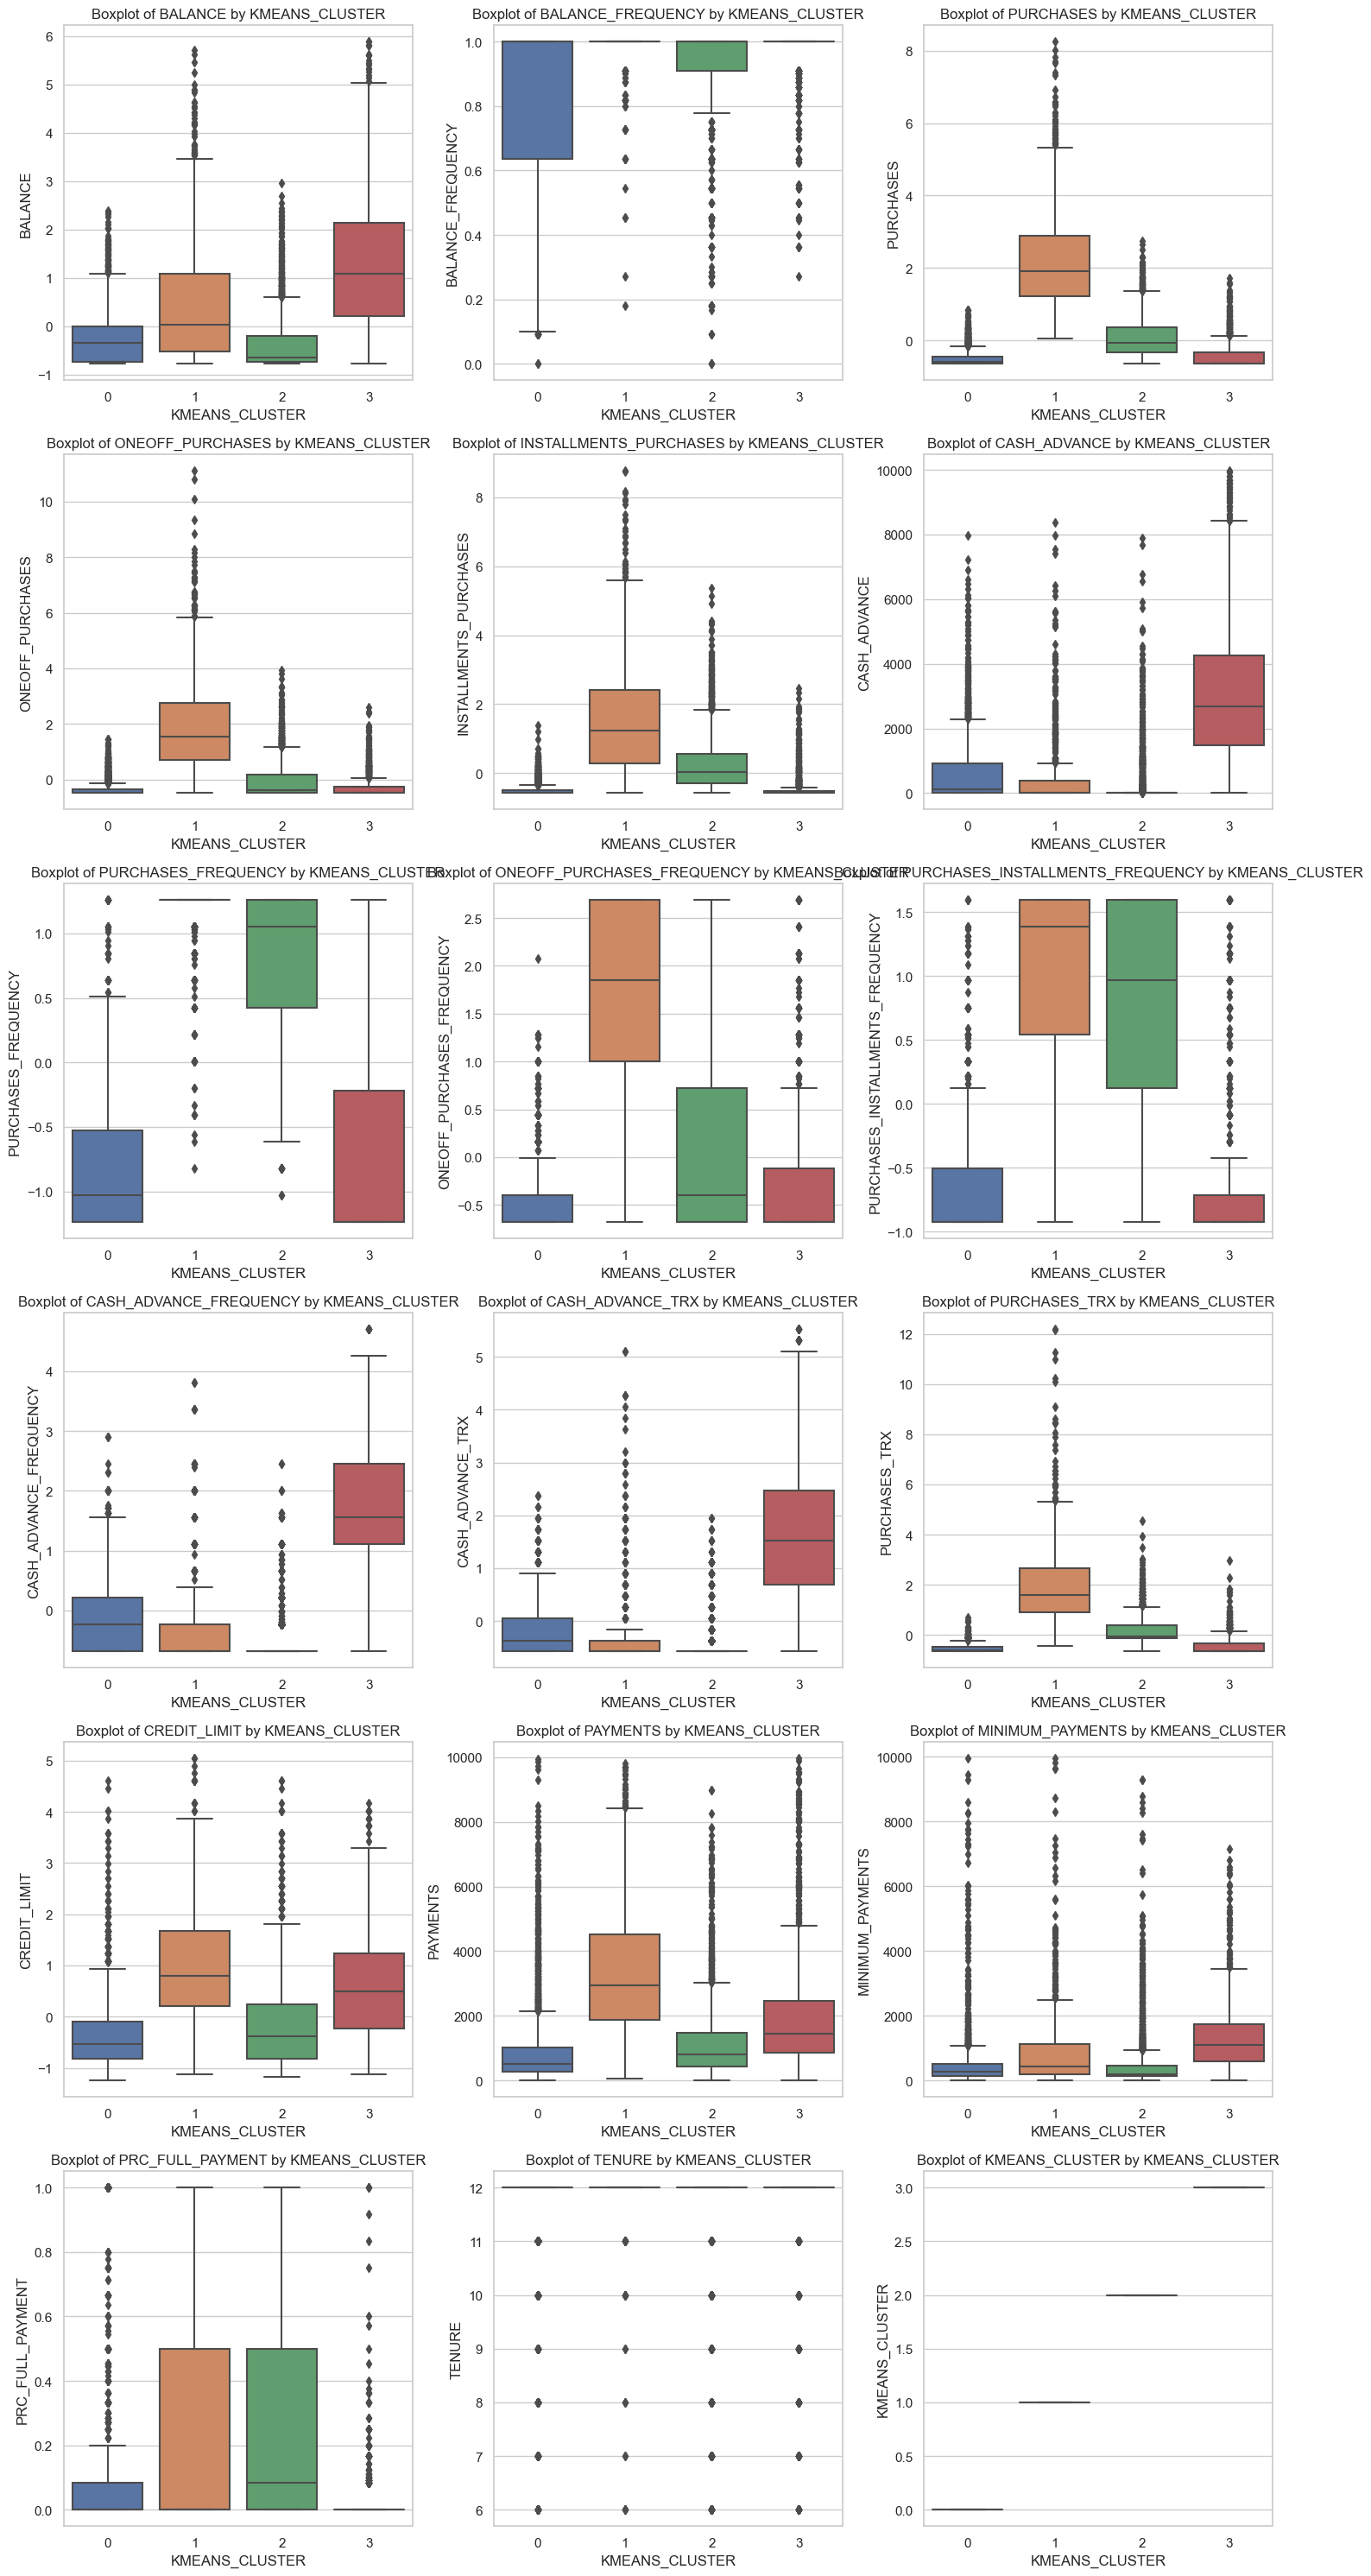

In [219]:
feature = df.columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df.columns[:-1]):
    ax = axes.flatten()[i]
    sns.boxplot(x='KMEANS_CLUSTER', y=feature, data=df, ax=ax)
    ax.set_title(f'Boxplot of {feature} by KMEANS_CLUSTER')

plt.tight_layout()
plt.show()

In this code, the DataFrame 'df' is grouped by the 'KMEANS_CLUSTER' column using the groupby method. Then, the mean method is applied to calculate the mean of each feature within each K-means cluster. The result is stored in the 'df_km' DataFrame, which provides the average values of each feature for each cluster identified by K-means clustering. Finally, the index of 'df_km' is reset to make the cluster labels a regular column, and the resulting DataFrame is displayed. This grouped DataFrame can be useful for further analysis and interpretation of the cluster characteristics, as it provides an overview of the feature means for each cluster.

In [220]:
df_km = df.groupby('KMEANS_CLUSTER').mean()
df_km.reset_index(inplace=True)
df_km

KMEANS_CLUSTER   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0               0 -0.265952           0.813045  -0.510024         -0.360442  \
1               1  0.472940           0.984047   2.238524          1.937024   
2               2 -0.391413           0.921705   0.068217         -0.062855   
3               3  1.298156           0.968764  -0.421162         -0.281402   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0               -0.490741    601.487674            -0.822073  \
1                1.580832    528.729939             1.140441   
2                0.245011    176.739768             0.839351   
3               -0.431691   3087.102398            -0.689288   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                   -0.455166                         -0.689582  \
1                    1.629424                          0.994434   
2                    0.135321                          0.709255   
3                   -0.294610                         -0.617368   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0               -0.106939         -0.181343      -0.534148     -0.374427  \
1               -0.264518         -0.209595       2.014818      1.004596   
2               -0.521867         -0.462156       0.164955     -0.147898   
3                1.720040          1.730890      -0.433078      0.618479   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE   
0   928.331595        483.073324          0.090613  11.472170  \
1  3437.244477        935.917586          0.263022  11.894253   
2  1141.248761        478.349124          0.259383  11.550152   
3  2057.446623       1322.225331          0.023593  11.382616   

   AGGLOMERATIVE_CLUSTERING  
0                  2.721388  
1                  0.909195  
2                  0.122594  
3                  0.974005

This code generates a grid of bar plots to visualize the average values of each feature within different clusters obtained from the K-means clustering. The variable 'feature' iterates through the columns of the 'df_km' DataFrame, which was created in the previous step and contains the average values of each feature for each K-means cluster.

For each feature, a bar plot is created, showing how the average value of that feature differs across the clusters identified by K-means clustering. These bar plots provide a visual representation of how the features vary in terms of their average values within each cluster. This analysis can help in understanding the characteristics of each cluster and how they differ from one another in terms of feature averages.

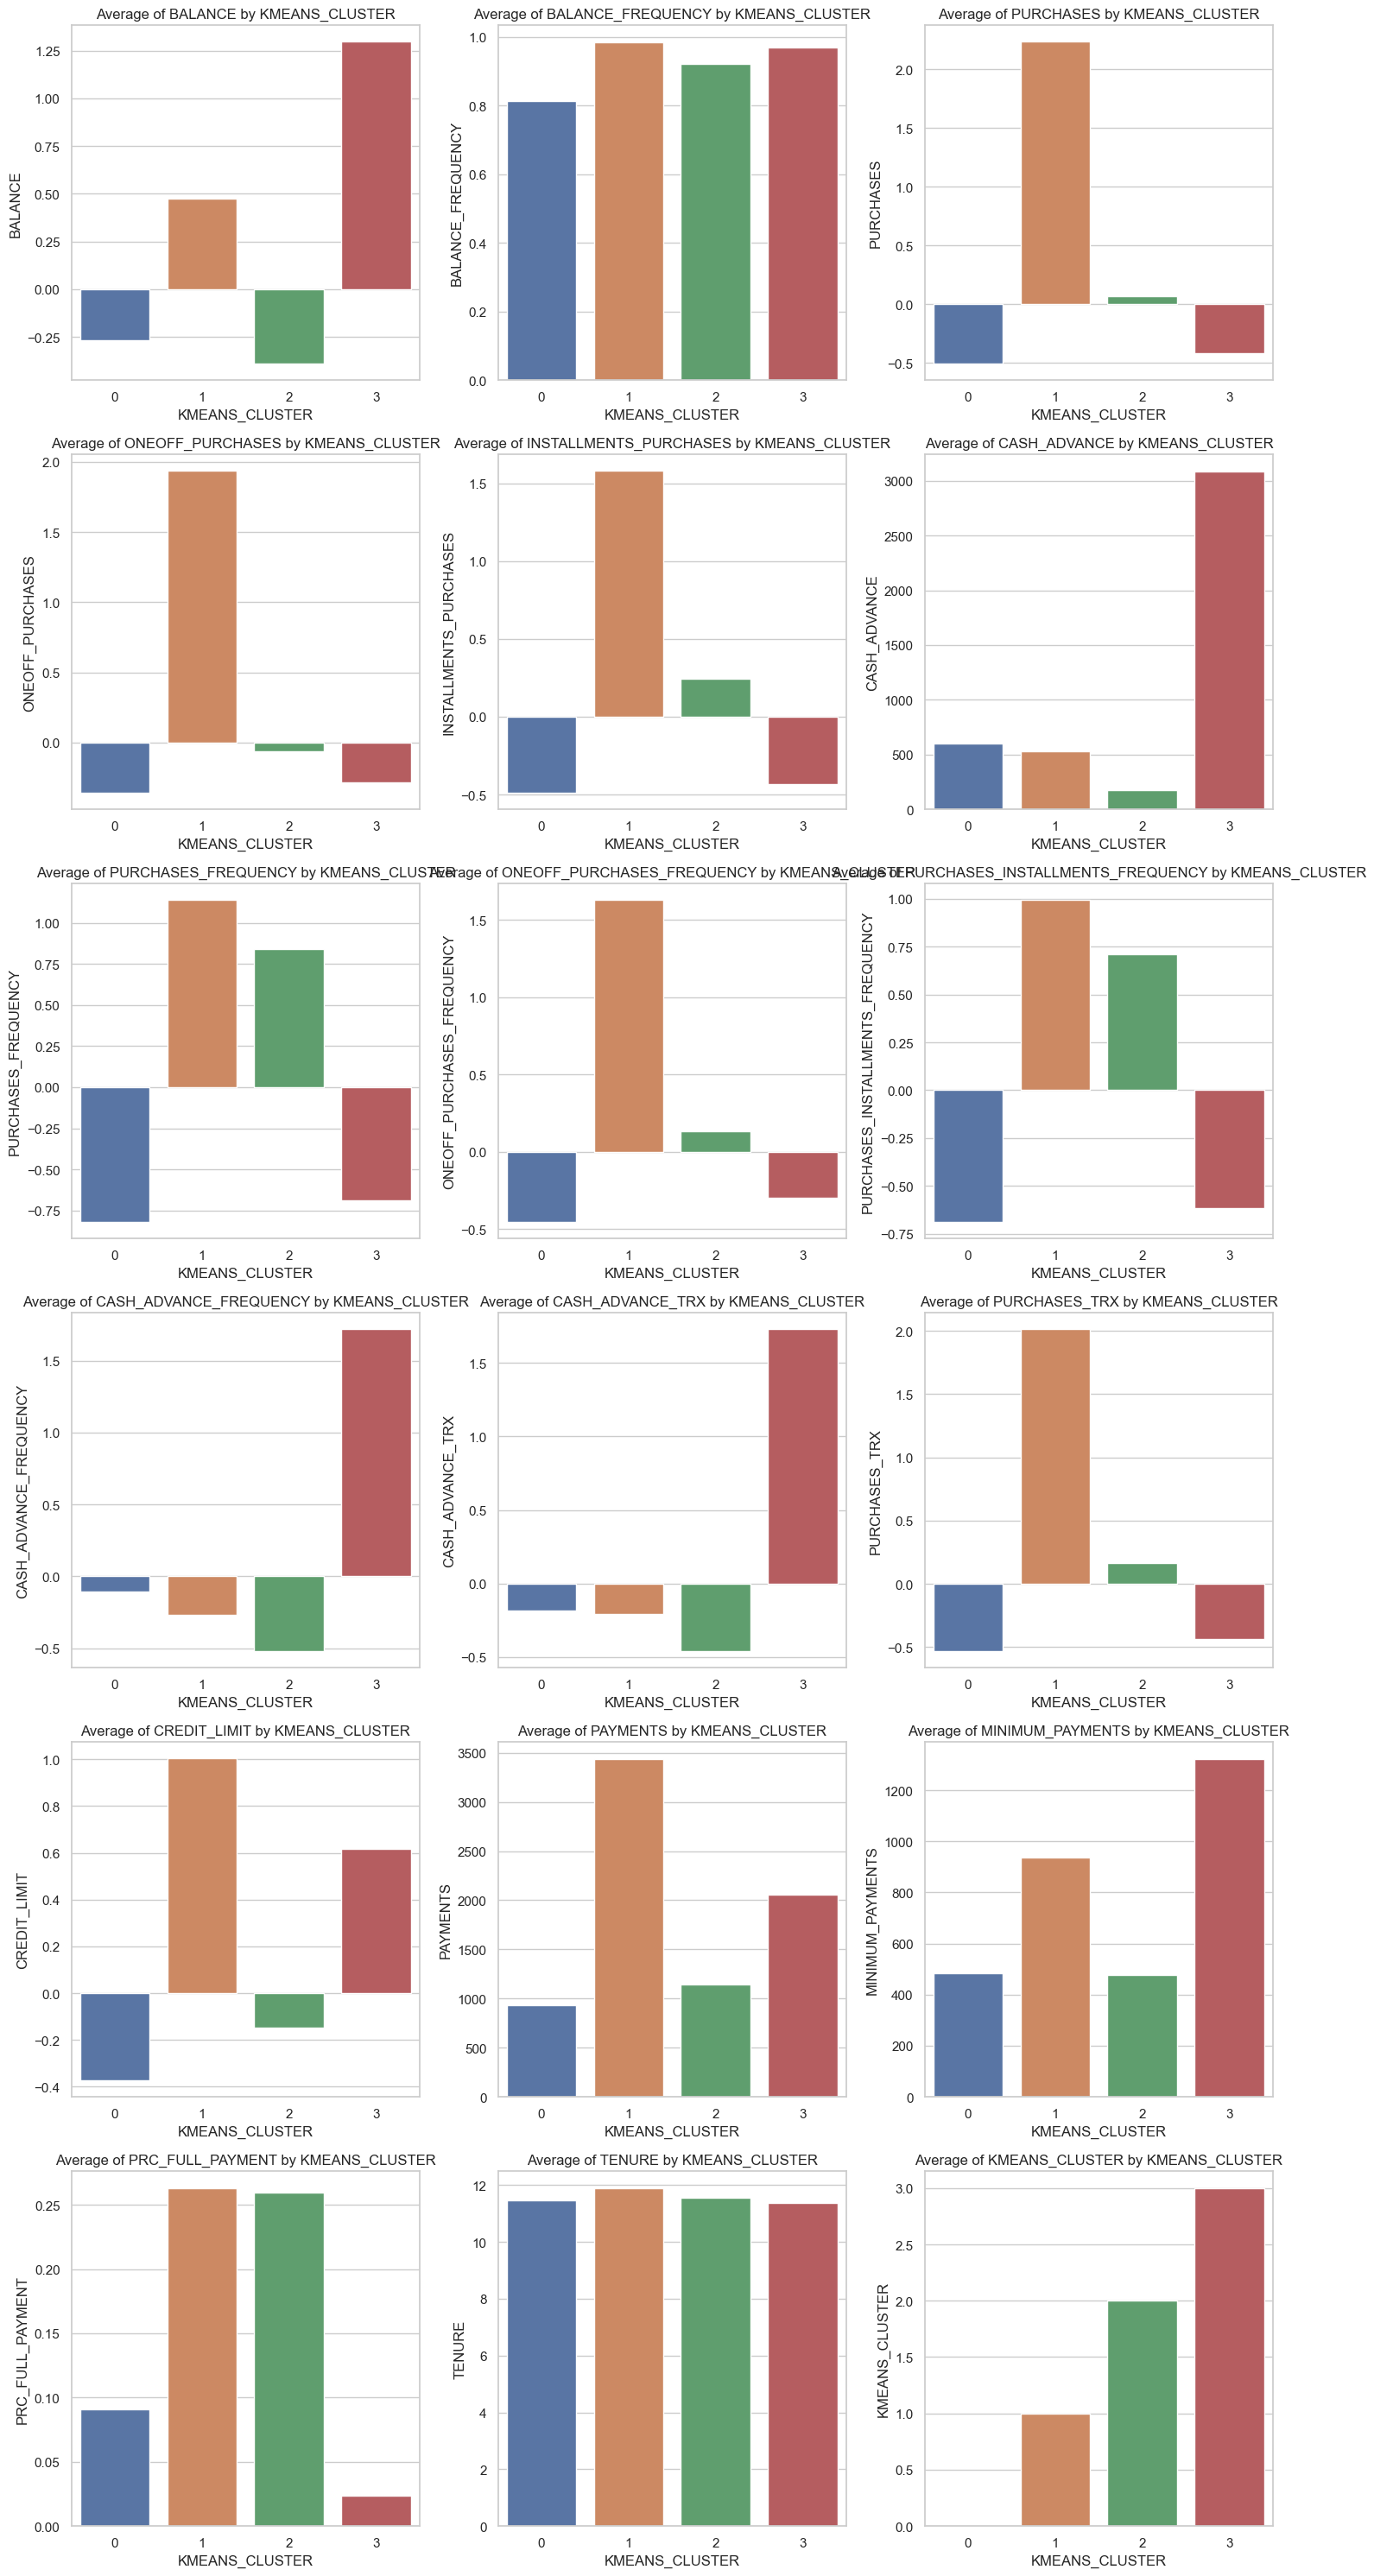

In [221]:
feature = df_km.columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df.columns[:-1]):
    ax = axes.flatten()[i]
    sns.barplot(x='KMEANS_CLUSTER', y=feature, data=df_km, ax=ax)
    ax.set_title(f'Average of {feature} by KMEANS_CLUSTER')

plt.tight_layout()
plt.show()

This code generates a grid of box plots to visualize the distribution of each feature within different clusters obtained from the Agglomerative Clustering. The variable 'feature' iterates through the columns of the 'df' DataFrame, which contains the data with the assigned Agglomerative Clustering labels.

For each feature, a box plot is created, showing the distribution of that feature within each cluster identified by the Agglomerative Clustering. These box plots provide a visual representation of how the values of the features are distributed within each cluster, including information on the median, quartiles, and potential outliers. This analysis helps in understanding how the features vary within and across clusters, revealing insights into the clustering results.

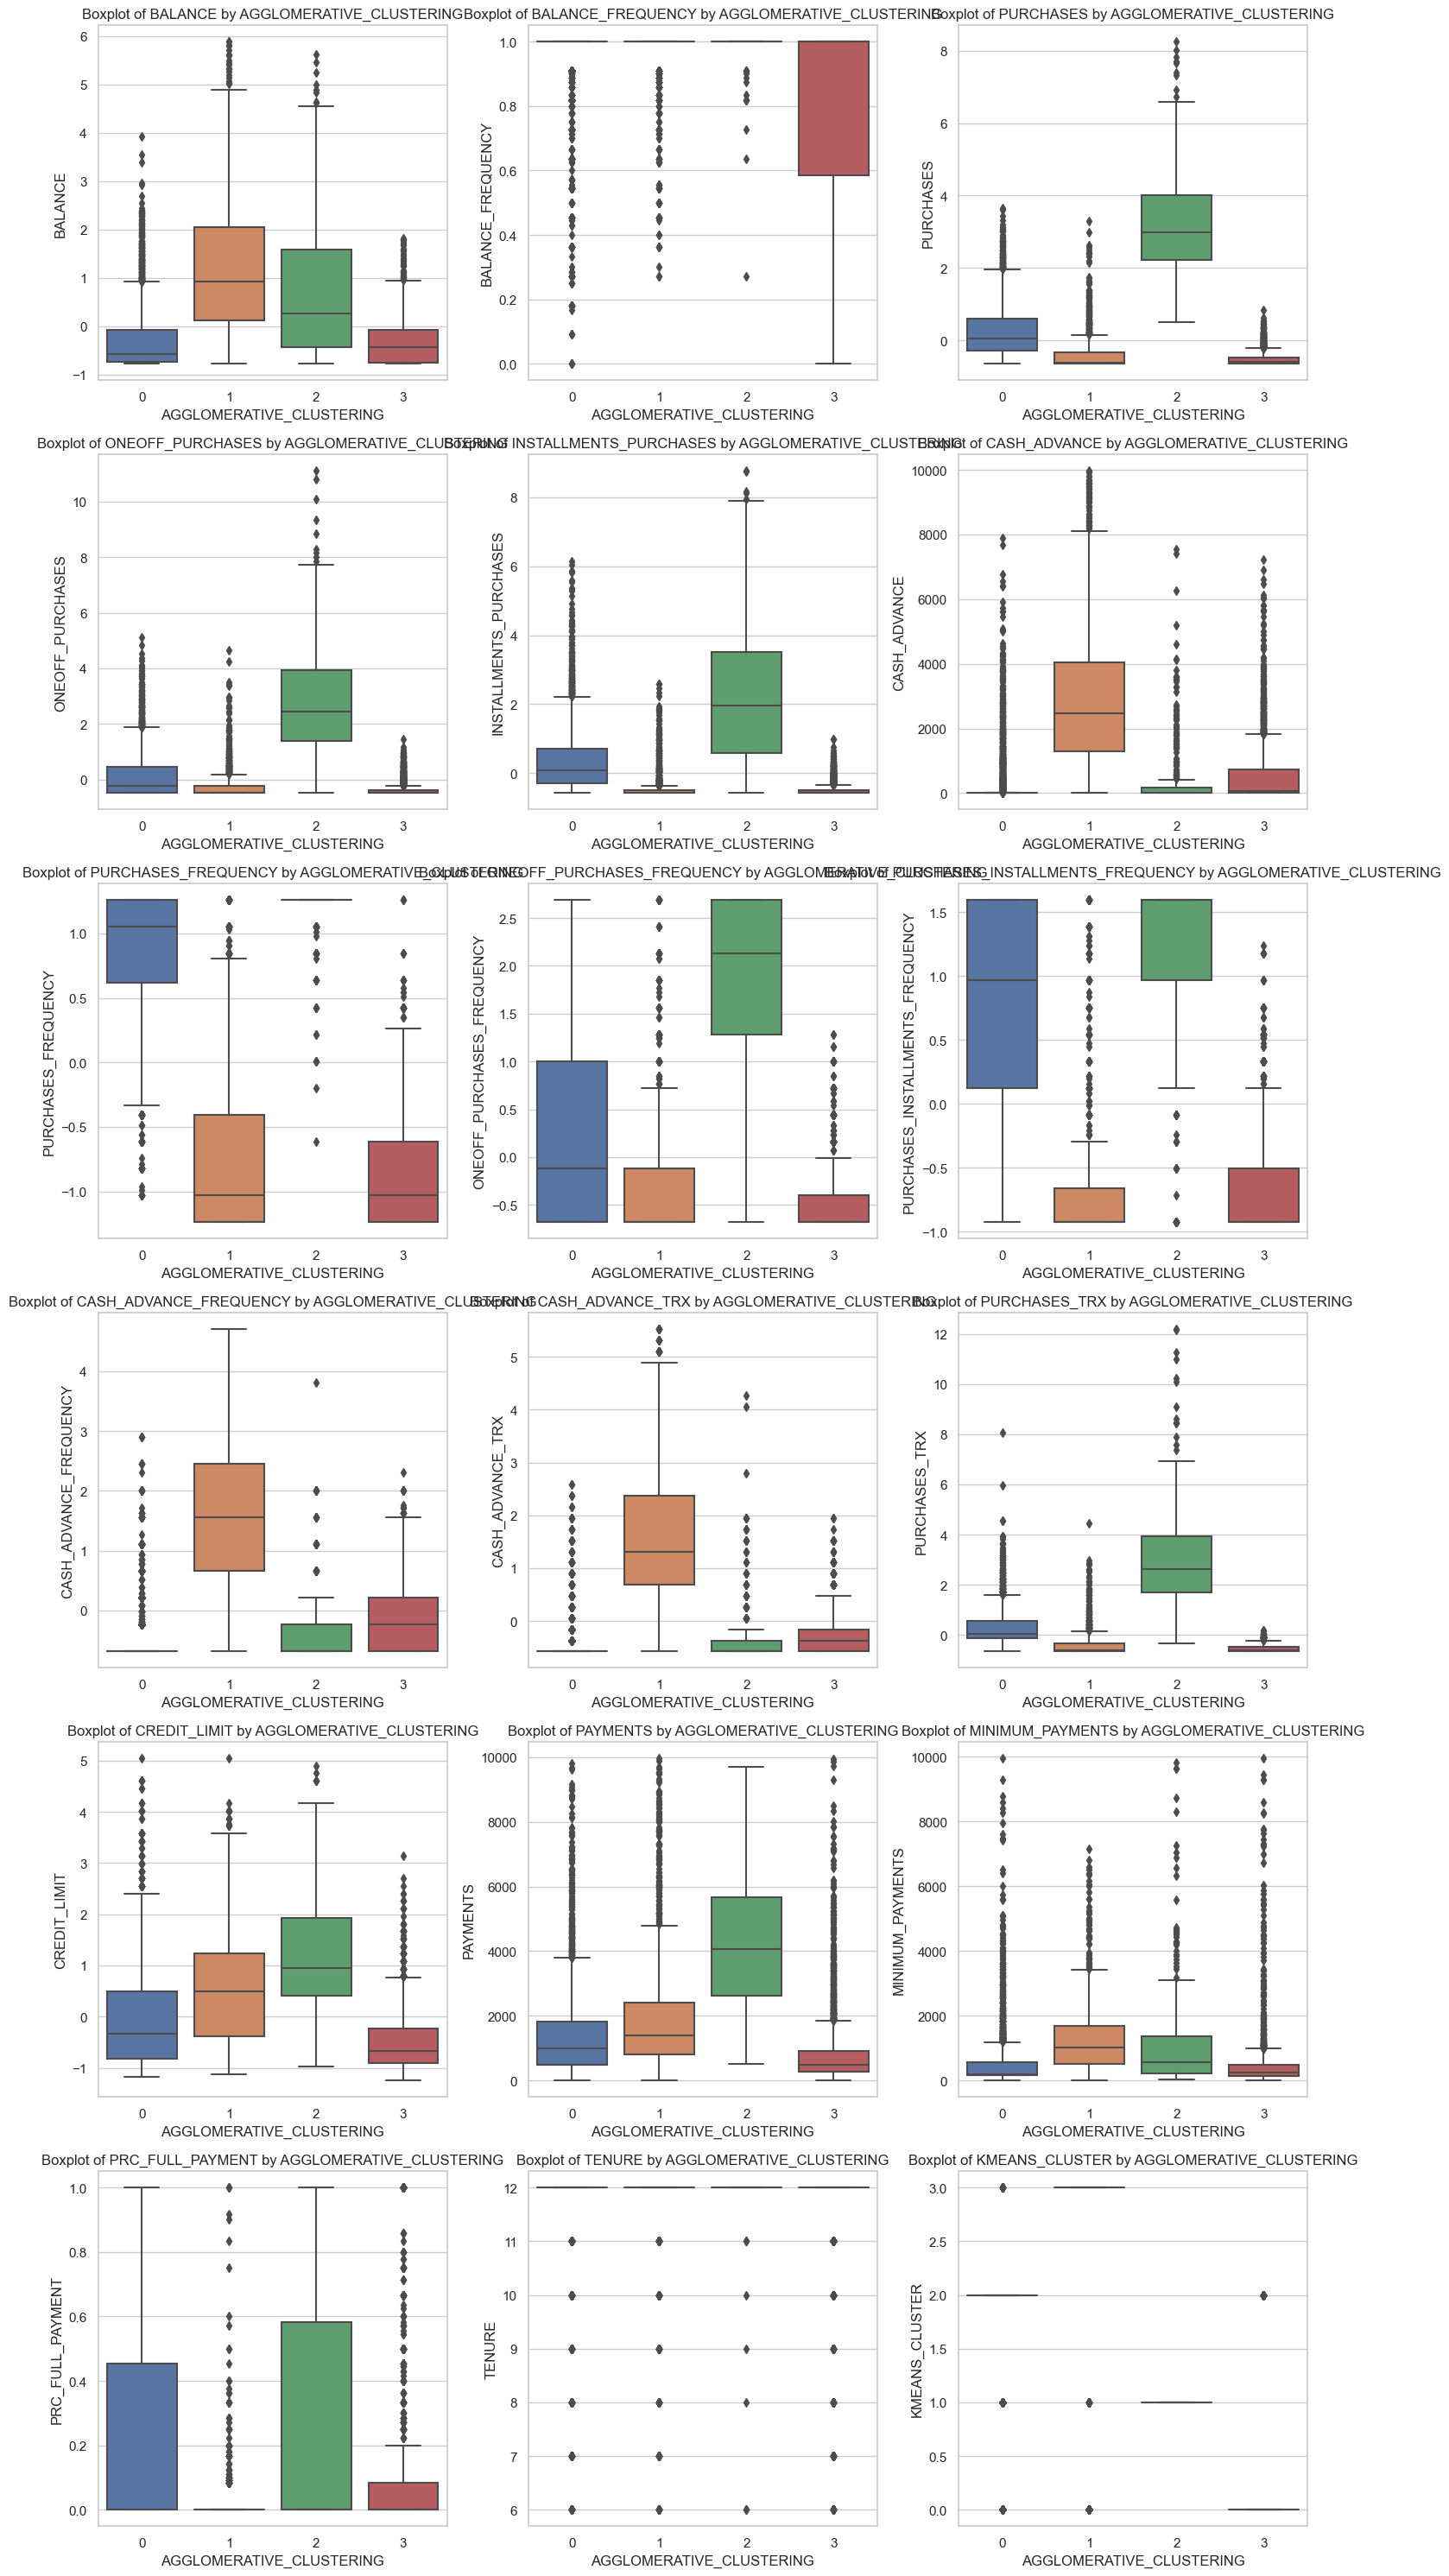

In [222]:
feature = df.columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df.columns[:-1]):
    ax = axes.flatten()[i]
    sns.boxplot(x='AGGLOMERATIVE_CLUSTERING', y=feature, data=df, ax=ax)
    ax.set_title(f'Boxplot of {feature} by AGGLOMERATIVE_CLUSTERING')

plt.tight_layout()
plt.show()

This code calculates the mean values of each feature in the original DataFrame ('df') for each cluster obtained from Agglomerative Clustering. It groups the data by the 'AGGLOMERATIVE_CLUSTERING' labels, calculates the mean for each feature within each cluster, and stores the results in the 'df_ms' DataFrame. The 'reset_index' function is used to reset the index of the resulting DataFrame.

As a result, 'df_ms' contains the mean values of all the features for each cluster, providing a summary of the average behavior of credit cardholders within each cluster. This information can be valuable for understanding the characteristics and tendencies of different customer segments identified by the clustering algorithm.

In [223]:
df_ms = df.groupby('AGGLOMERATIVE_CLUSTERING').mean()
df_ms.reset_index(inplace=True)
df_ms

AGGLOMERATIVE_CLUSTERING   BALANCE  BALANCE_FREQUENCY  PURCHASES   
0                         0 -0.283224           0.932747   0.250821  \
1                         1  1.195352           0.963365  -0.381819   
2                         2  0.754071           0.992093   3.265045   
3                         3 -0.332708           0.800389  -0.525887   

   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE   
0          0.114841                0.342408    252.254854  \
1         -0.241505               -0.413359   2914.015641   
2          2.868564                2.236129    449.862016   
3         -0.382230               -0.489218    512.981618   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY   
0             0.855546                    0.319597  \
1            -0.671433                   -0.268668   
2             1.176206                    1.866762   
3            -0.838667                   -0.484913   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX   
0                          0.705670               -0.450072         -0.405546  \
1                         -0.601969                1.591281          1.592844   
2                          1.117209               -0.353744         -0.288363   
3                         -0.687246               -0.185176         -0.246832   

   PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS   
0       0.301656      0.009013  1393.141376        529.663860  \
1      -0.400352      0.585495  2029.664635       1256.812537   
2       2.985354      1.228566  4278.289195       1164.932935   
3      -0.541824     -0.446131   846.918613        448.236198   

   PRC_FULL_PAYMENT     TENURE  KMEANS_CLUSTER  
0          0.250186  11.581336        1.777683  
1          0.024474  11.383369        2.565187  
2          0.265484  11.919786        1.000000  
3          0.102941  11.493756        0.081674

This code generates a set of bar plots to visualize the average values of different features within each cluster obtained from Agglomerative Clustering. It uses the 'df_ms' DataFrame, which contains the average values of various features for each cluster. For each feature, it plots a bar chart showing the average value for each cluster (AGGLOMERATIVE_CLUSTERING label).

The code iterates through the features and creates a bar plot for each one, displaying how the feature's average varies across different clusters. This visualization helps in understanding the differences in feature averages across the identified clusters, which can provide insights into the characteristics of each cluster.

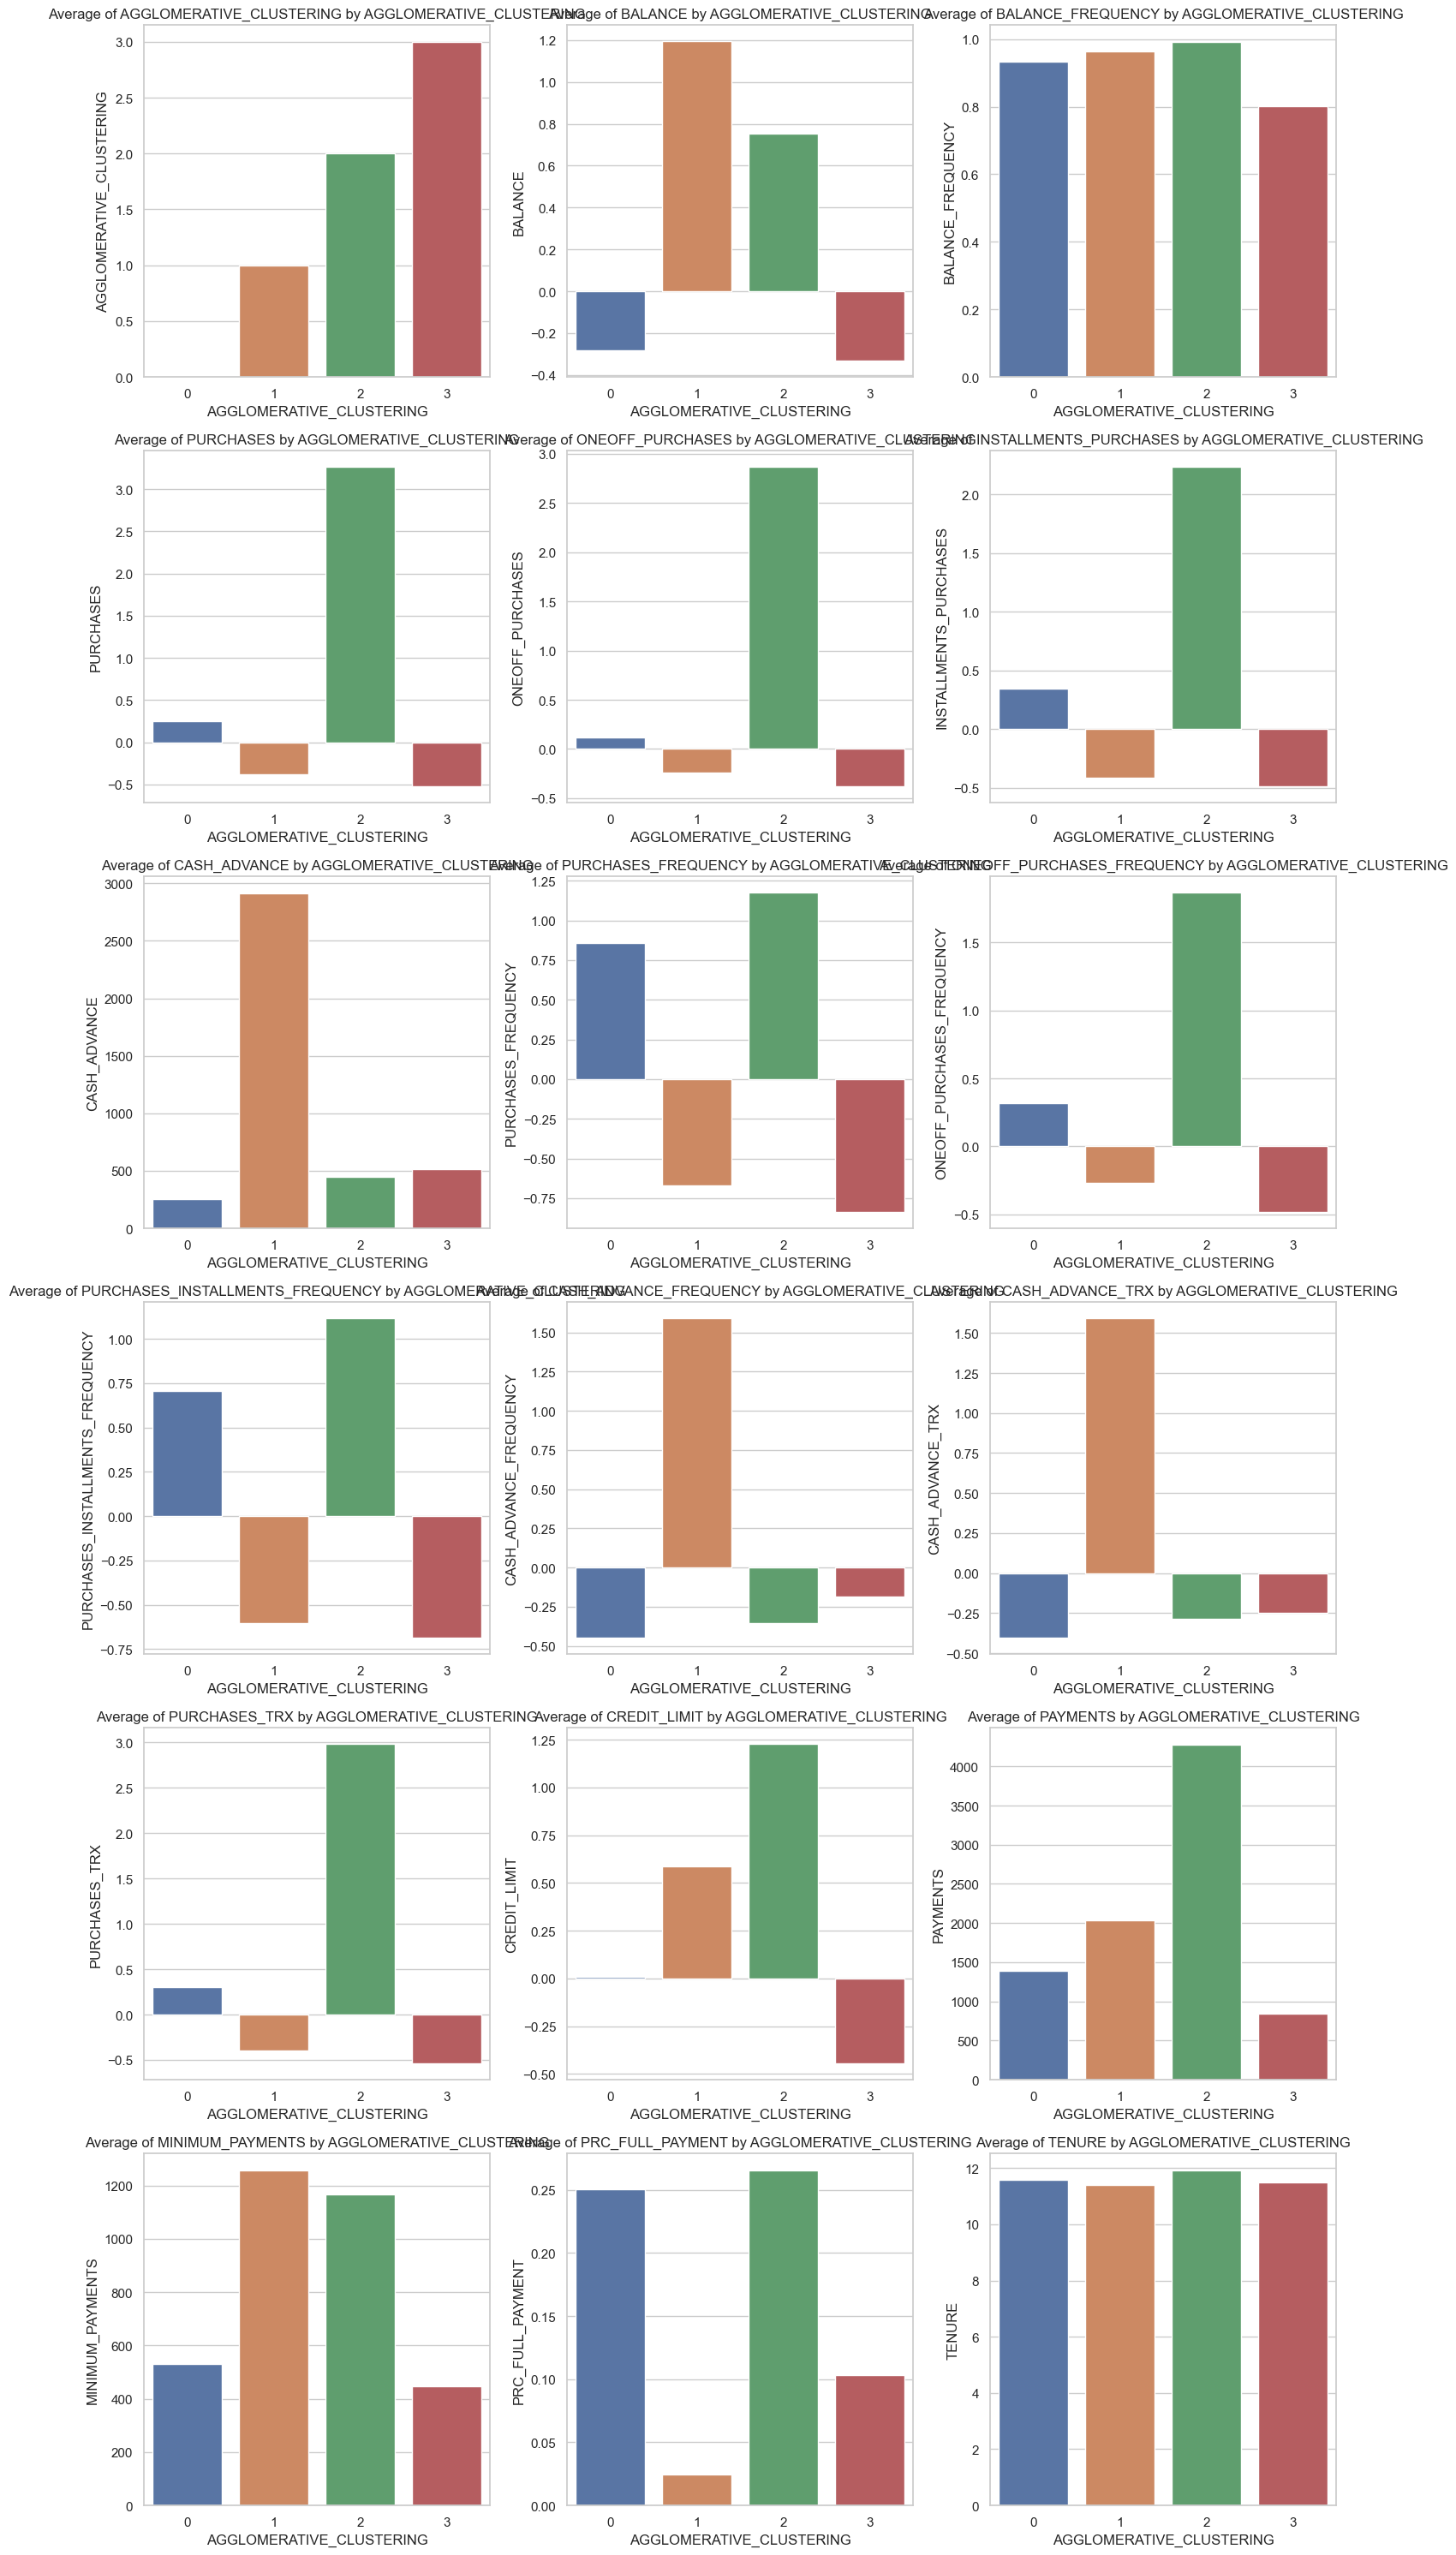

In [224]:
feature = df_ms.columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df_ms.columns[:-1]):
    ax = axes.flatten()[i]
    sns.barplot(x='AGGLOMERATIVE_CLUSTERING', y=feature, data=df_ms, ax=ax)
    ax.set_title(f'Average of {feature} by AGGLOMERATIVE_CLUSTERING')

plt.tight_layout()
plt.show()

This code counts the number of data points (samples) in each cluster generated by the Agglomerative Clustering algorithm. It uses the 'AGGLOMERATIVE_CLUSTERING' column in the DataFrame 'df' to determine the cluster assignment of each data point.

The 'value_counts()' function is applied to the 'AGGLOMERATIVE_CLUSTERING' column, and it returns a series where the index represents the cluster label, and the values represent the count of data points in each cluster. This provides information about the size and distribution of data points across different clusters, which can be useful for understanding how the data is partitioned by the clustering algorithm.

In [225]:
df['AGGLOMERATIVE_CLUSTERING'].value_counts()

AGGLOMERATIVE_CLUSTERING
0    3504
3    2963
1    1419
2     374
Name: count, dtype: int64

The results from the Agglomerative Clustering algorithm indicate the distribution of data points among the generated clusters. The numbers 0, 3, 1, and 2 represent different cluster labels, and the corresponding counts reflect the number of data points assigned to each cluster. Cluster 0 is the largest, containing 3,504 data points, suggesting that a substantial portion of the data falls into this group. Cluster 3 follows with 2,963 data points, while Cluster 1 is the third-largest with 1,419 data points. Cluster 2 is the smallest, including 374 data points. This distribution reveals the grouping of data points based on their similarity or proximity to each other. Understanding the characteristics of these clusters and how data points are grouped within them can offer valuable insights into patterns and trends present in the dataset, aiding in further analysis and decision-making processes.

This code counts the number of data points (samples) in each cluster generated by the K-means clustering algorithm. It uses the 'KMEANS_CLUSTER' column in the DataFrame 'df' to determine the cluster assignment of each data point.

The 'value_counts()' function is applied to the 'KMEANS_CLUSTER' column, and it returns a series where the index represents the cluster label, and the values represent the count of data points in each cluster. This provides information about the size and distribution of data points across different clusters, which can be useful for understanding how the data is partitioned by the clustering algorithm.

In [226]:
df['KMEANS_CLUSTER'].value_counts()

KMEANS_CLUSTER
0    3198
2    2961
3    1231
1     870
Name: count, dtype: int64

The results from the K-means Clustering algorithm show how the data points are distributed among the generated clusters, each labeled with a number: 2, 3, 0, and 1. These labels represent different clusters, and the corresponding counts reveal the number of data points assigned to each cluster. Cluster 2 is the largest, comprising 3,203 data points, indicating that a significant portion of the data falls into this cluster. Cluster 3 follows closely with 2,958 data points, making it the second-largest group. Cluster 0 is the third-largest with 1,232 data points, and Cluster 1 is the smallest, including 867 data points. This distribution provides insights into how data points are grouped based on their similarities and proximity within the dataset. Understanding the characteristics and patterns of these clusters can be instrumental in identifying meaningful trends and relationships within the data, aiding in tasks such as customer segmentation, anomaly detection, or targeted marketing strategies.

Although the DBSCAN Clustering method produced the highest silhouette score however by visual scanning of the clusters it seems like there is a big cluster which is overlapping the pthers which is not an ideal scenario for clustering so inspite og DBSCAN giving the highest silhpuette score, I will still discard it and focus on Agglomerative Clustering and K_Means Clustering. For the company, the insights derived from these clusters might not have as much of an overall impact. While K_Means may have a slightly lower Silhouette Score than DBSCAN Clustering but higher than Agglomerative Clustering, I believe it is more applicable because it did a good job of forming clusters where customer behaviours are strongly varied between them and each cluster has a strong amount of sample support. I'll continue working with the K-Means clusters now.

This code generates a series of bar plots to illustrate the average values of different features within individual clusters resulting from a K-means clustering analysis. Each subplot displays a feature on the y-axis, while the x-axis represents different clusters labeled as 'KMEANS_CLUSTER.' The code iterates through each feature and creates a subplot for it, with each subplot showing how the feature's average values vary across the clusters. This visualization aids in understanding how distinct the clusters are with respect to various features, providing insights into the differences and similarities among cluster members. The tight layout of subplots ensures clarity and organization, making it easier to interpret the results.

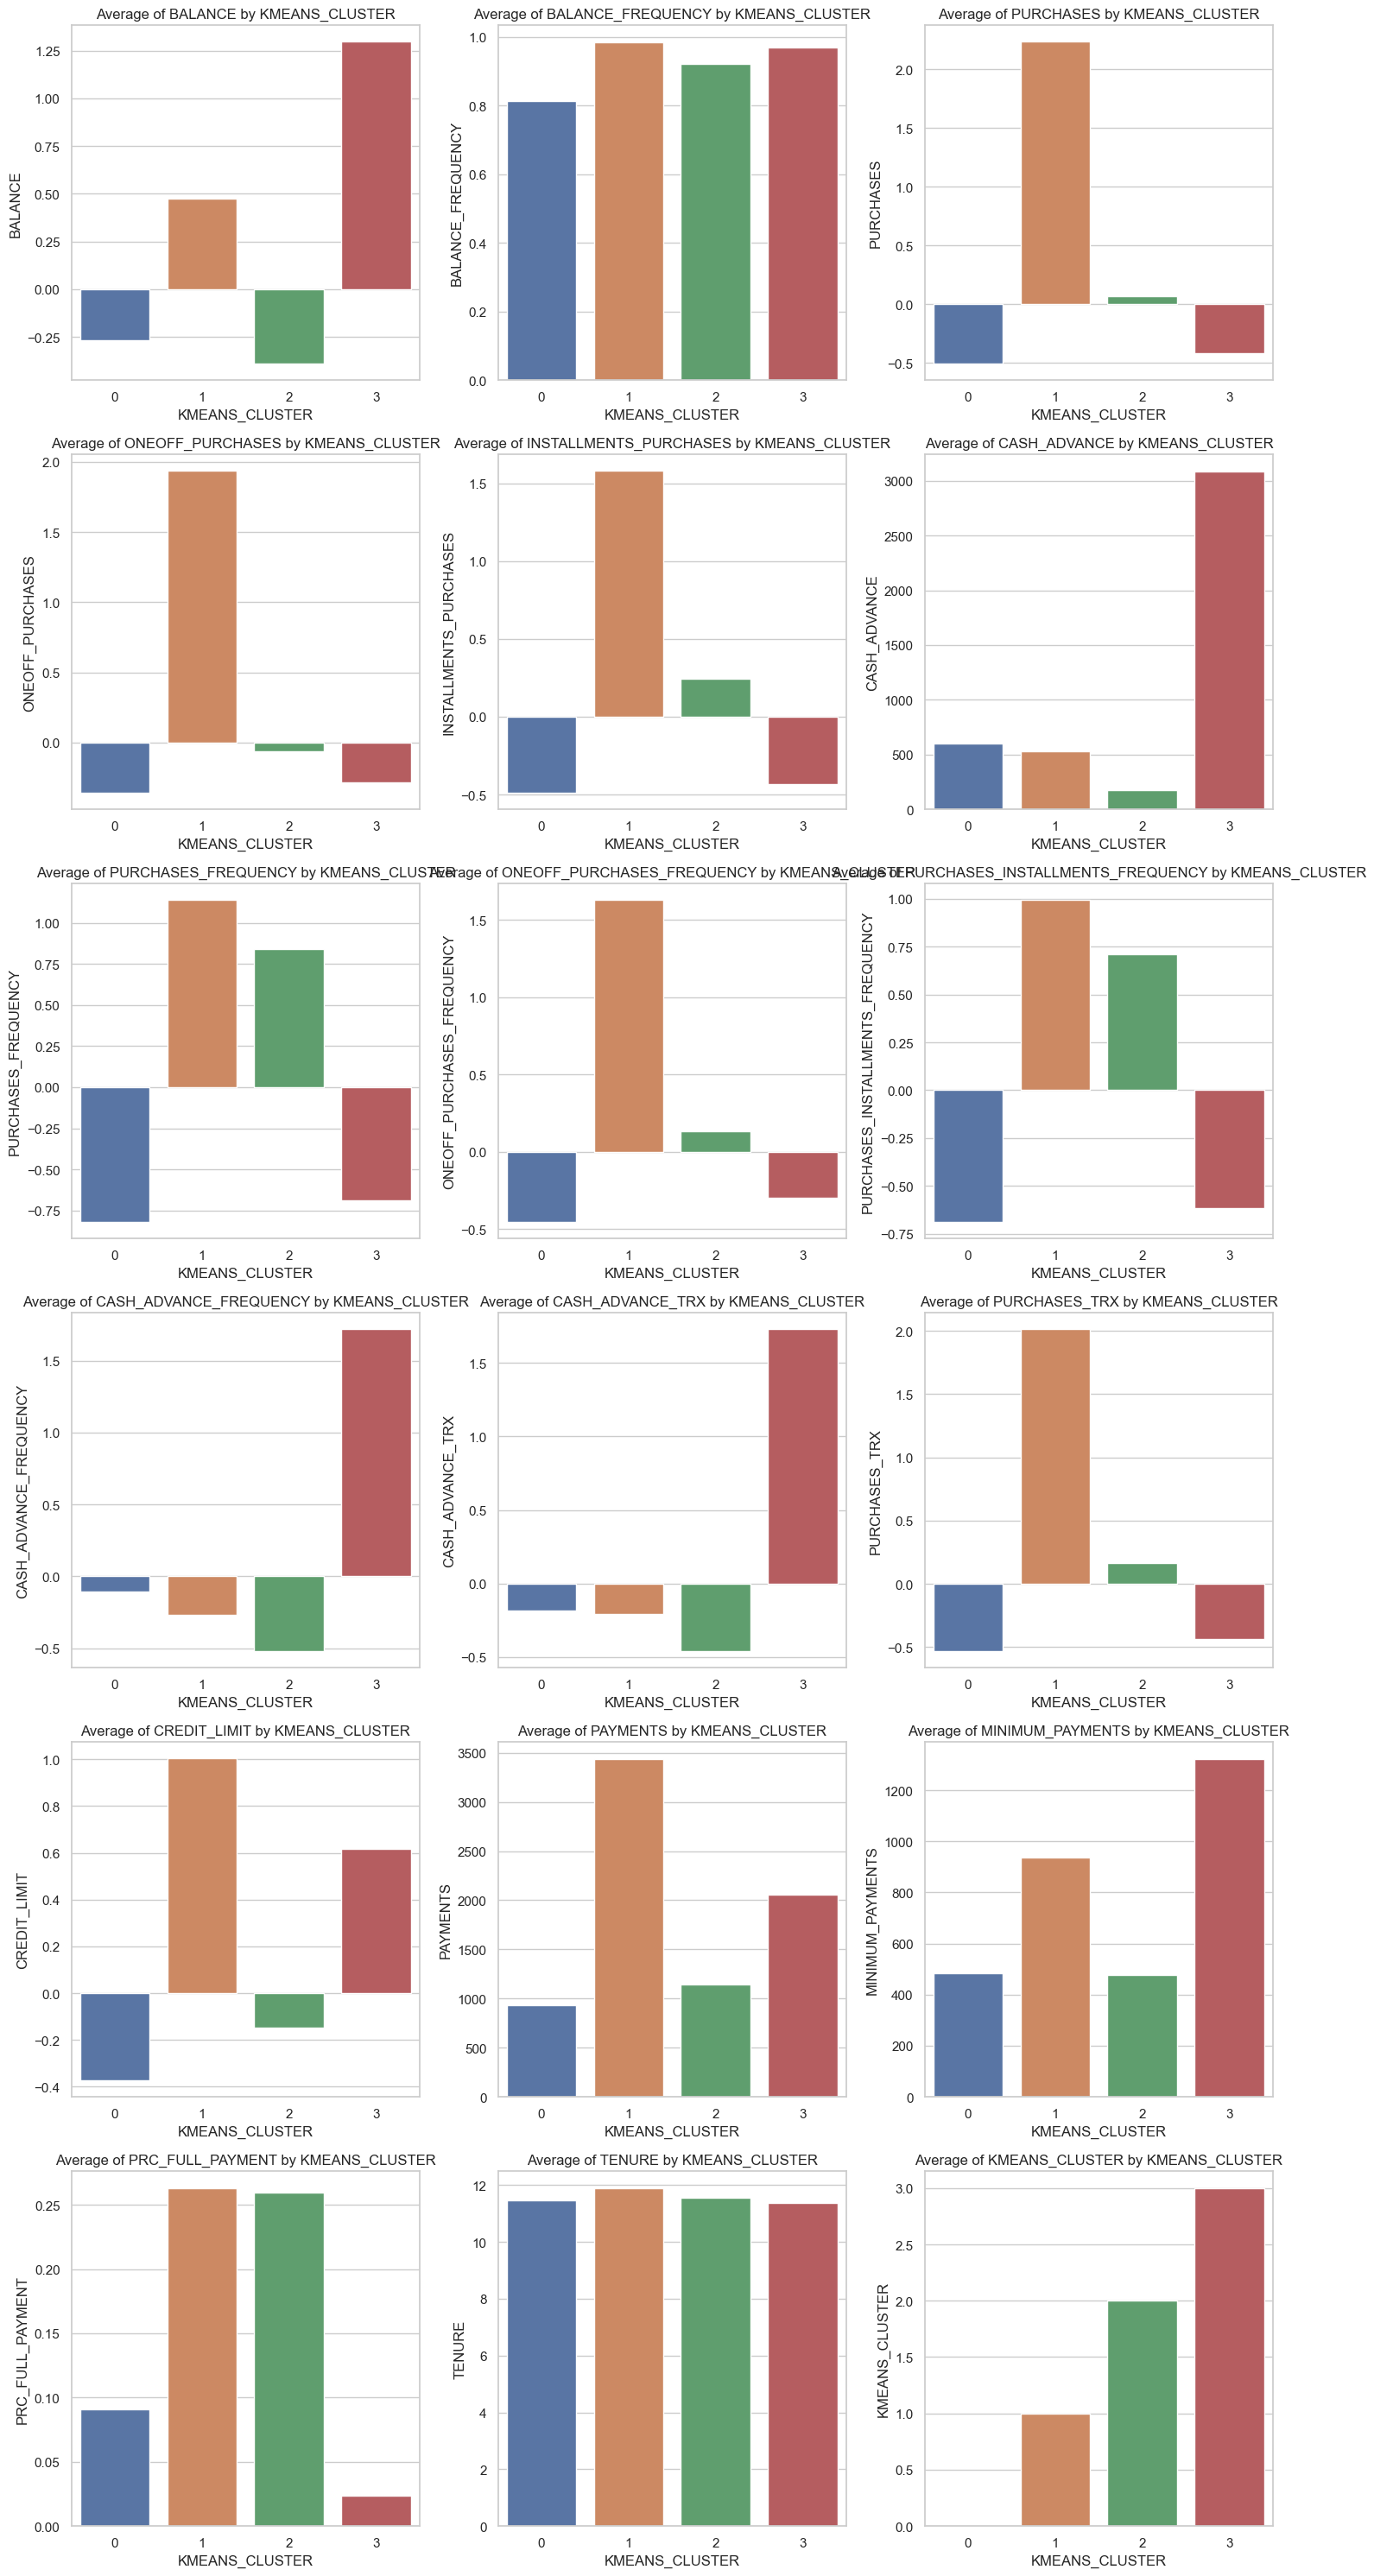

In [227]:
feature = df_km.columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(df.columns[:-1]):
    ax = axes.flatten()[i]
    sns.barplot(x='KMEANS_CLUSTER', y=feature, data=df_km, ax=ax)
    ax.set_title(f'Average of {feature} by KMEANS_CLUSTER')

plt.tight_layout()
plt.show()

When I analyzed the average values of the four clusters identified by the K-means Clustering algorithm, I can draw some meaningful conclusions about different customer groups:

1. Contrary to what you might expect, the customers with the highest account balances (cluster 1) don't necessarily make the most purchases. It's the customers with moderately high balances (cluster 2) who tend to make frequent and significant purchases.

2. On average, customers with the highest balances tend to make lower-value purchases. However, they have a higher tendency to pay in cash advances and make more substantial minimum payments. This suggests that these customers might be more financially responsible compared to others.

3. The customers in the middle balance group (cluster 2), who make purchases frequently, also have a higher rate of paying off their balances in full. This indicates that even though they shop often, they tend to be responsible when it comes to repaying their credit card balances.

An analysis of the customer segmentation:

- Cluster 3 - Low Activity Customers: These customers make the fewest purchases and have the lowest available credit. The credit card company seems to allocate credit accurately, as it matches their low value to the company.

- Cluster 0 - High-Value, High-Risk Customers: Despite having a lower credit limit, they make purchases at a higher rate, don't pay cash in advance often, and have the lowest minimum payments. Their status as high-value, high-risk customers is reflected in their relatively low credit limits, ranking just above low activity customers.

- Cluster 1 - Low-Risk Customers: These customers are low risk, characterized by good repayment habits, reasonable balances, and a lower frequency of purchases.

- Cluster 2 - High Value, Medium Risk: These are the sweet spot customers. They purchase frequently, maintain moderately high balances, make substantial minimum payments, and often pay their balances in full. They are slightly riskier than Cluster 1 due to their higher spending frequency, but they bring significant value to the company without the high risk associated with Cluster 0.

___________________________________________________________________________________________________________________________________________________________________________________

### Actionable Insights [5 marks]:

- Provide business recommendations based on the clusters formed. How would you target different customer segments?

Cluster 2 | High Value, Medium Risk

To maximize the value of Cluster 2 customers, the company should consider extending their credit limits, which can encourage them to make more purchases. While these customers are likely to repay, possibly not as consistently as Cluster 1, offering increased credit could lead to more interest revenue. The company can further entice spending by offering incentives, loyalty programs, and partnerships with businesses that appeal to frequent buyers. Collaborating with grocery stores, clothing retailers, and entertainment companies, where customers often make frequent purchases, offers an opportunity to extract more value from these customers.

Cluster 1 | Low Risk, High Value Potential

Cluster 1 presents an opportunity for the company to encourage more spending by enhancing the credit card benefits they receive. These are financially savvy customers who make sound financial decisions. By offering rewards, air miles, cashback, or points, the company can incentivize them to use the credit card more frequently. This cluster represents potential high-value customers, and the company can attract benefit sponsors seeking financially responsible consumers. Emphasizing the credit card as the more financially responsible option for these customers is likely to increase usage rates and enhance the company's value.

Cluster 0 | High Value, High Risk

With Cluster 0 customers, the company should consider charging higher interest rates to offset the repayment risk associated with them. Higher interest rates may motivate improved repayment behavior and provide compensation in case of missed payments. While providing credit to these active spenders is advantageous, risk mitigation strategies must be in place to safeguard against the high-risk repayment patterns exhibited by this cluster.

Cluster 3 | Low Activity, Low Value

To enhance the value of Cluster 3 customers, they need to be incentivized to spend more. Given their limited purchase activity and low balances, encouraging higher spending and credit utilization is crucial. Benefit partnerships, incentives such as minimum usage requirements, or lower interest rates on frequent purchases can stimulate greater card usage. The company might also consider offering cards with monthly or yearly service charges to extract value from these customers, even if they don't use their cards frequently. This approach helps offset servicing costs and encourages usage. Minimum usage requirements or monthly service charges for inactive users could prompt these customers to utilize their cards more effectively.


___________________________________________________________________________________________________________________________________________________________________________________